# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [2]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

In [3]:
file_db = "~/Downloads/chinook.sqlite"
model_name = 'mistral'

In [4]:
config = {
    'model': model_name,   # 'mistral' # "starcoder2"
}
vn = MyVanna(config=config)

In [5]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [6]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [7]:
vn.run_sql_is_set

True

In [8]:
def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

In [9]:
def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

In [10]:
if False:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [11]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,01c4a964-460b-5e1c-af1e-622c8210b835-sql,\n Hint: album quantity is found in invoi...,"SELECT i.CustomerId, COUNT(ii.InvoiceLineId) A...",sql
1,0658ba3d-98ff-51f4-9006-a24f87045858-sql,How many customers are there,"SELECT COUNT(*) FROM ""customers""",sql
2,0e1a2b7b-d65e-53de-b839-edb7afcf4ab1-sql,\n Hint: album quantity is found in invoi...,"SELECT i.CustomerId, COUNT(ii.TrackId) AS Tota...",sql
3,127fd4bd-b9af-539d-9313-1d0234d073b7-sql,"\n There are 3 tables: artists, albums and...","SELECT a.Name, COUNT(t.TrackId) AS TotalTracks...",sql
4,15ac2fa5-0191-5f4b-95fe-f1cc0e4c1791-sql,\n Find the customer with the most invoi...,"SELECT CustomerId, COUNT(InvoiceId) AS NumberO...",sql
5,17d893d5-1417-5ba3-a5ca-9f6ce15a727f-sql,\n Identify artists who have albums with...,"SELECT a.ArtistId, a.Name AS ArtistName\nFROM ...",sql
6,27a11d7d-78c7-5027-ab98-36e4ee8f791c-sql,\n Find the top 5 customers who spent th...,"SELECT c.CustomerId, SUM(i.Total) AS TotalSpen...",sql
7,3013d1b4-feb2-519d-bfb9-114500436e3d-sql,\n Find the customer with the most invoi...,"SELECT c.CustomerId, COUNT(i.InvoiceId) AS Tot...",sql
8,32b99e7b-31ab-55d8-8431-fb010fa7af85-sql,\n Find the top 5 customers who spent th...,"SELECT c.CustomerId, SUM(i.Total) AS TotalSpen...",sql
9,4033dd5b-7f55-5895-a91f-b03a091843cc-sql,\n List all invoices with a total exceedi...,"SELECT *\nFROM ""invoices"" \nWHERE (Total > 10)...",sql


In [12]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [13]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [14]:
if False:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

In [15]:
if False:
    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the SQLite database invoice means order")

## Asking the AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

In [16]:
ts_start = time()

```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

Add of existing embedding ID: d8a2f948-dffa-5524-a5f9-174cc1a8da73-sql
Add of existing embedding ID: 0658ba3d-98ff-51f4-9006-a24f87045858-sql
Add of existing embedding ID: 127fd4bd-b9af-539d-9313-1d0234d073b7-sql
Add of existing embedding ID: 32b99e7b-31ab-55d8-8431-fb010fa7af85-sql
Add of existing embedding ID: d8a2f948-dffa-5524-a5f9-174cc1a8da73-sql
Add of existing embedding ID: 0658ba3d-98ff-51f4-9006-a24f87045858-sql
Add of existing embedding ID: d8a37163-5ce5-58cd-a316-ea5598d44d27-sql
Add of existing embedding ID: a7185c88-7417-5b75-a52e-4eaef5f9deca-sql
Add of existing embedding ID: 6f22268c-5062-5f11-ba2d-8555f06b409d-sql
Add of existing embedding ID: 49e67df3-a604-51f8-ad01-b8f5a2043eac-sql
Add of existing embedding ID: dd282d7c-a4ef-5e3a-87e0-cb45fac50808-sql
Add of existing embedding ID: aea89953-21b2-55d1-9dda-431ee6033c3d-sql
Add of existing embedding ID: fd25ebba-4066-5a0f-8613-7b1c2ace0339-sql
Add of existing embedding ID: 6bed484b-9a80-57f4-ad89-5f775b5df252-sql
Add of

[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE sqlite_stat1(tbl,idx,stat)\n\nCREATE TABLE sqlite_sequence(name,seq)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "genres"\r\n(\r\n    GenreId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO

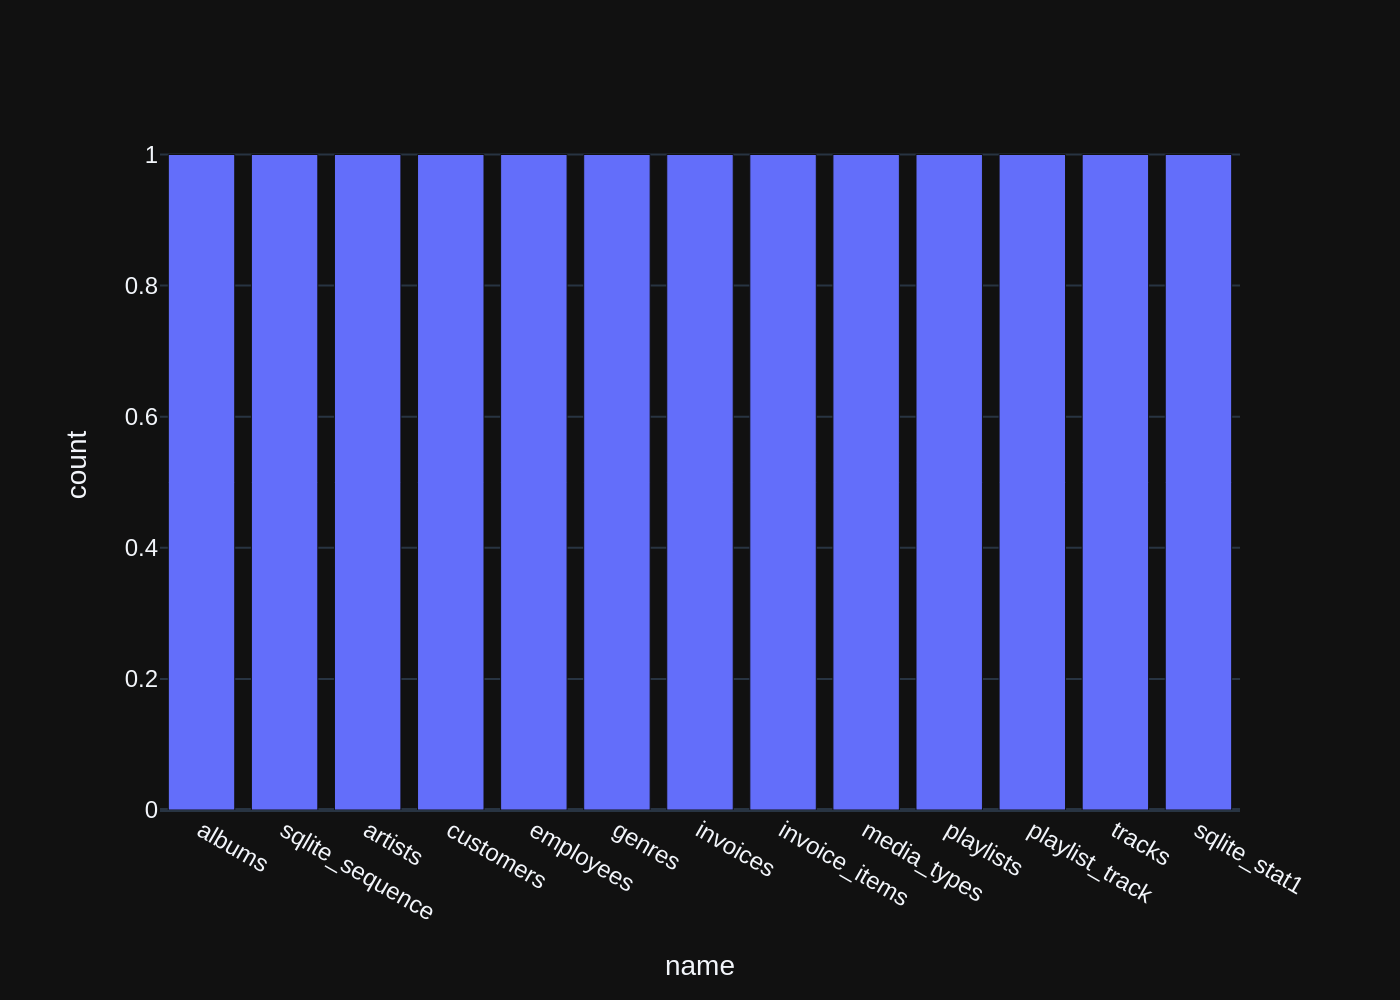

(" SELECT name FROM sqlite_master WHERE type='table'",
                name
 0            albums
 1   sqlite_sequence
 2           artists
 3         customers
 4         employees
 5            genres
 6          invoices
 7     invoice_items
 8       media_types
 9         playlists
 10   playlist_track
 11           tracks
 12     sqlite_stat1,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'name=%{x}<br>count=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['albums', 'sqlite_sequence', 'artists', 'customers', 'employees',
                           'genres', 'invoices', 'invoice_items', 'media_types', 'playlists',
                           'pl

In [17]:
vn.ask(question="Can you list all tables in the SQLite database catalog?")

In [18]:
vn.ask(question="which table stores customer's orders")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n

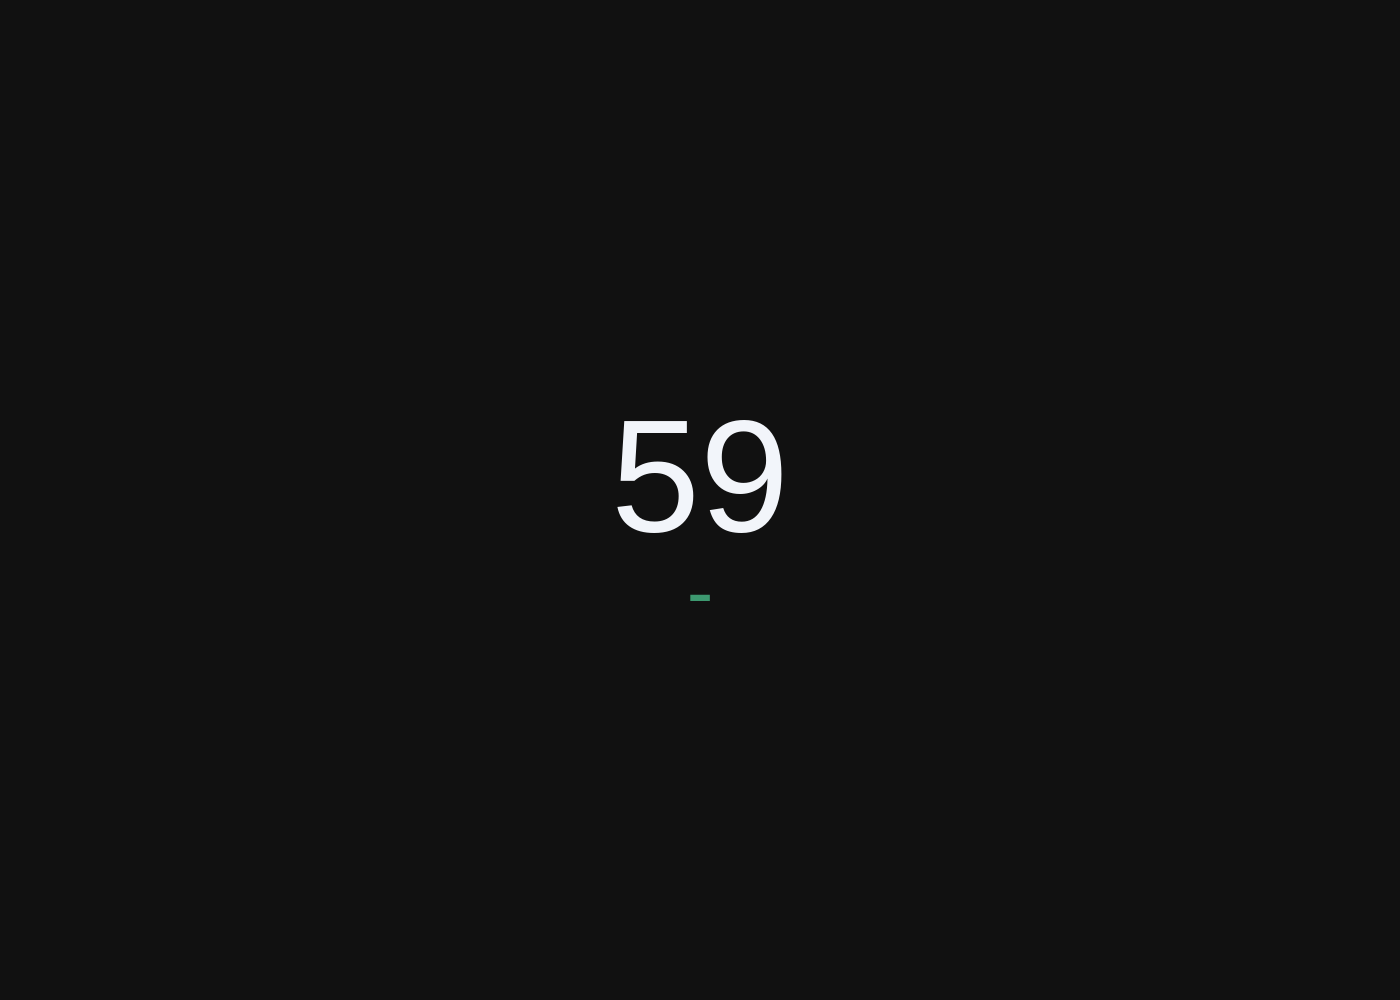

('SELECT COUNT(*) AS TotalCustomers FROM "customers"',
    TotalCustomers
 0              59,
 Figure({
     'data': [{'delta': {'reference': 59},
               'domain': {'x': [0, 1], 'y': [0, 1]},
               'mode': 'number+delta',
               'type': 'indicator',
               'value': 59}],
     'layout': {'template': '...'}
 }))

In [19]:
vn.ask(question="How many customers are there")

In [20]:
vn.ask(question="what are the top 5 countries that customers come from?")

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVAR

### More SQL questions

see `sample-sql-queries-sqlite-chinook.ipynb`

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Title NVARCHAR(160)  NOT NULL,\r\n    ArtistId INTEGER  NOT NULL,\r\n    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE

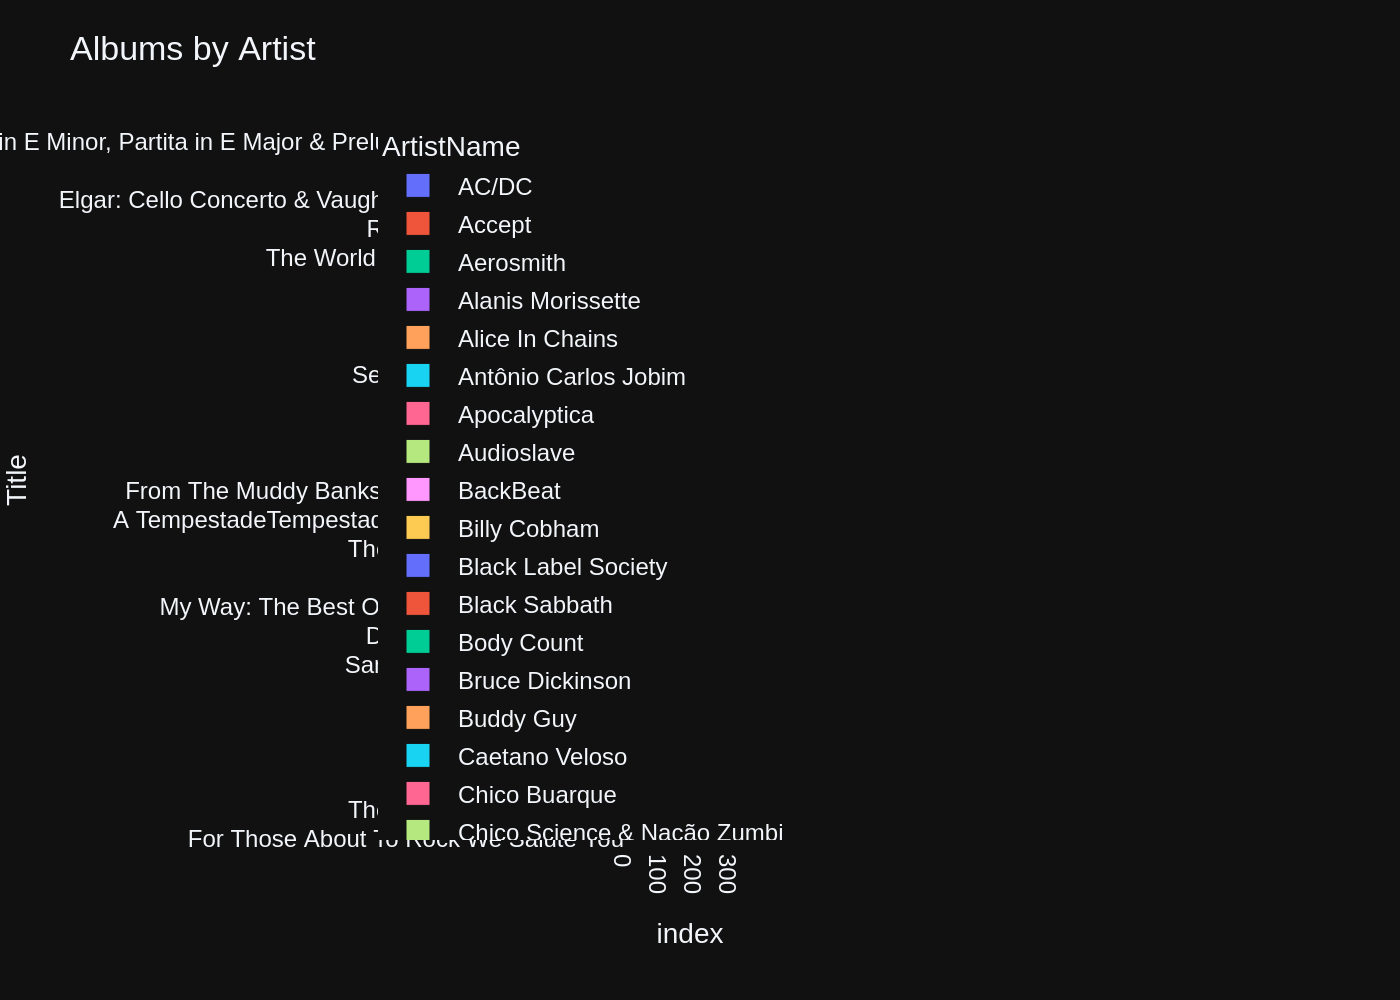

('SELECT a.Title, ar.Name AS ArtistName\nFROM "albums" a\nJOIN "artists" ar ON a.ArtistId = ar.ArtistId\n-------------------------',
                                                  Title  \
 0                For Those About To Rock We Salute You   
 1                                    Balls to the Wall   
 2                                    Restless and Wild   
 3                                    Let There Be Rock   
 4                                             Big Ones   
 ..                                                 ...   
 342                             Respighi:Pines of Rome   
 343  Schubert: The Late String Quartets & String Qu...   
 344                                Monteverdi: L'Orfeo   
 345                              Mozart: Chamber Music   
 346  Koyaanisqatsi (Soundtrack from the Motion Pict...   
 
                                             ArtistName  
 0                                                AC/DC  
 1                                       

In [21]:
question = """  
    List all albums and their corresponding artist names  
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaType

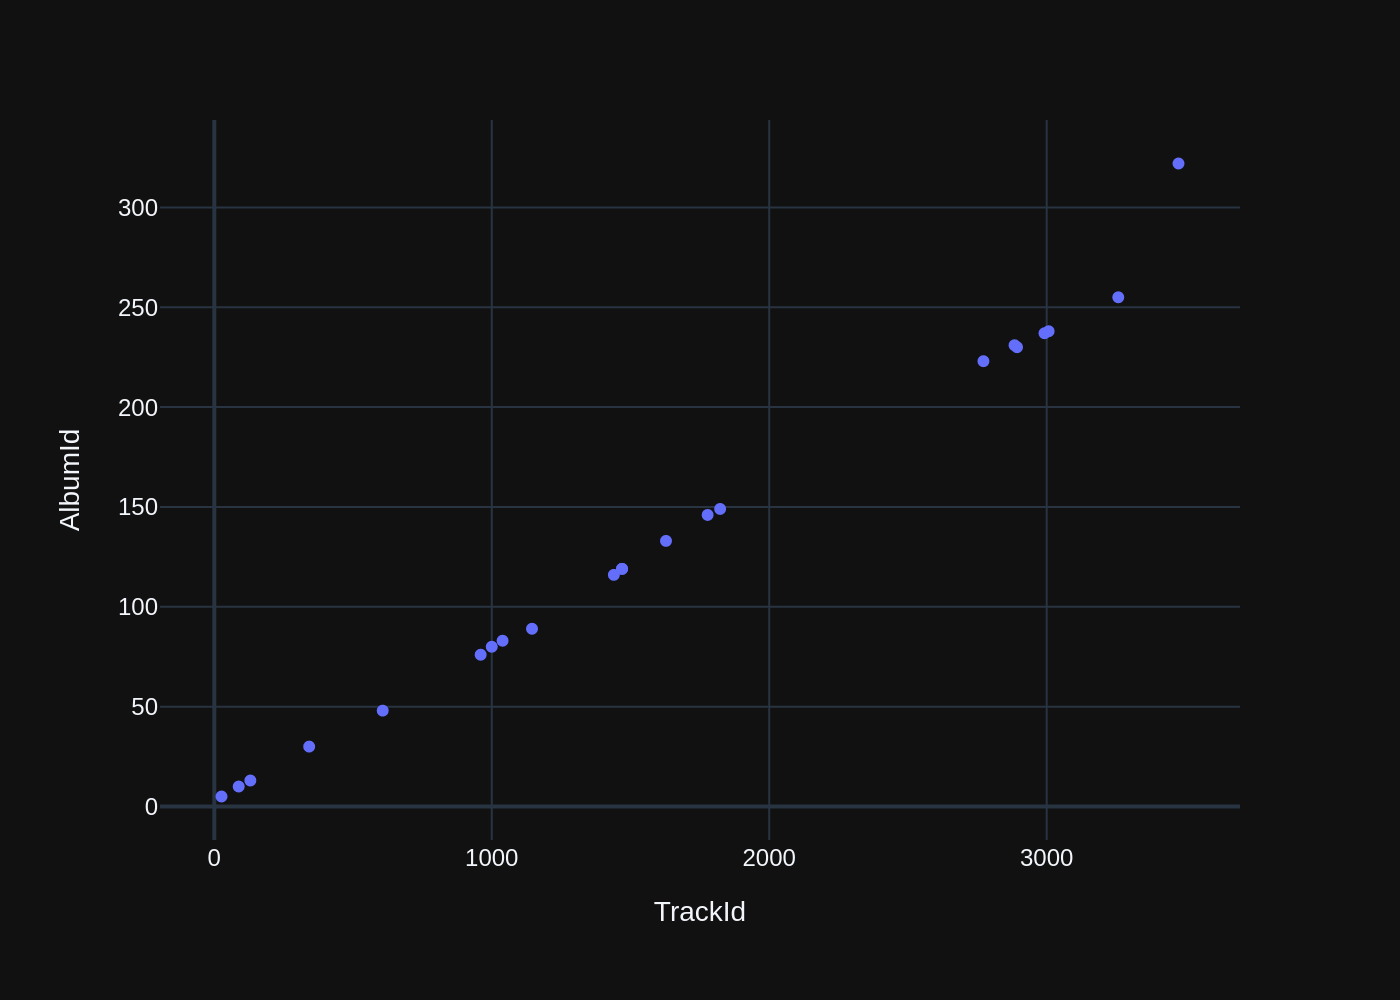

("SELECT * FROM tracks WHERE lower(Name) LIKE '%what%'",
     TrackId                                          Name  AlbumId  \
 0        26                                 What It Takes        5   
 1        88                                  What You Are       10   
 2       130                             Do what cha wanna       13   
 3       342                   What is and Should Never Be       30   
 4       607                                       So What       48   
 5       960                                    What A Day       76   
 6      1000                                 What If I Do?       80   
 7      1039                              What Now My Love       83   
 8      1145                                   Whatsername       89   
 9      1440             Whatever It Is, I Just Can't Stop      116   
 10     1469                         Look What You've Done      119   
 11     1470                             Get What You Need      119   
 12     1628        

In [22]:
question = """  
    Find all tracks with a name containing "What" (case-insensitive)
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

Insert of existing embedding ID: 49e67df3-a604-51f8-ad01-b8f5a2043eac-sql
Add of existing embedding ID: 49e67df3-a604-51f8-ad01-b8f5a2043eac-sql


Ollama Response:
{'model': 'mistral:latest', 'created_at': '2024-06-14T10:24:39.467759452Z', 'message': {'role': 'assistant', 'content': 'SELECT c.CustomerId, COUNT(i.InvoiceId) AS TotalInvoices\nFROM "customers" c\nJOIN "invoices" i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId'}, 'done_reason': 'stop', 'done': True, 'total_duration': 102744231979, 'load_duration': 768015, 'prompt_eval_count': 2026, 'prompt_eval_duration': 91854891000, 'eval_count': 54, 'eval_duration': 10126001000}
SELECT c.CustomerId, COUNT(i.InvoiceId) AS TotalInvoices
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
SELECT c.CustomerId, COUNT(i.InvoiceId) AS TotalInvoices
FROM "customers" c
JOIN "invoices" i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
    CustomerId  TotalInvoices
0            1              7
1            2              7
2            3              7
3            4              7
4            5              7
5            6              7

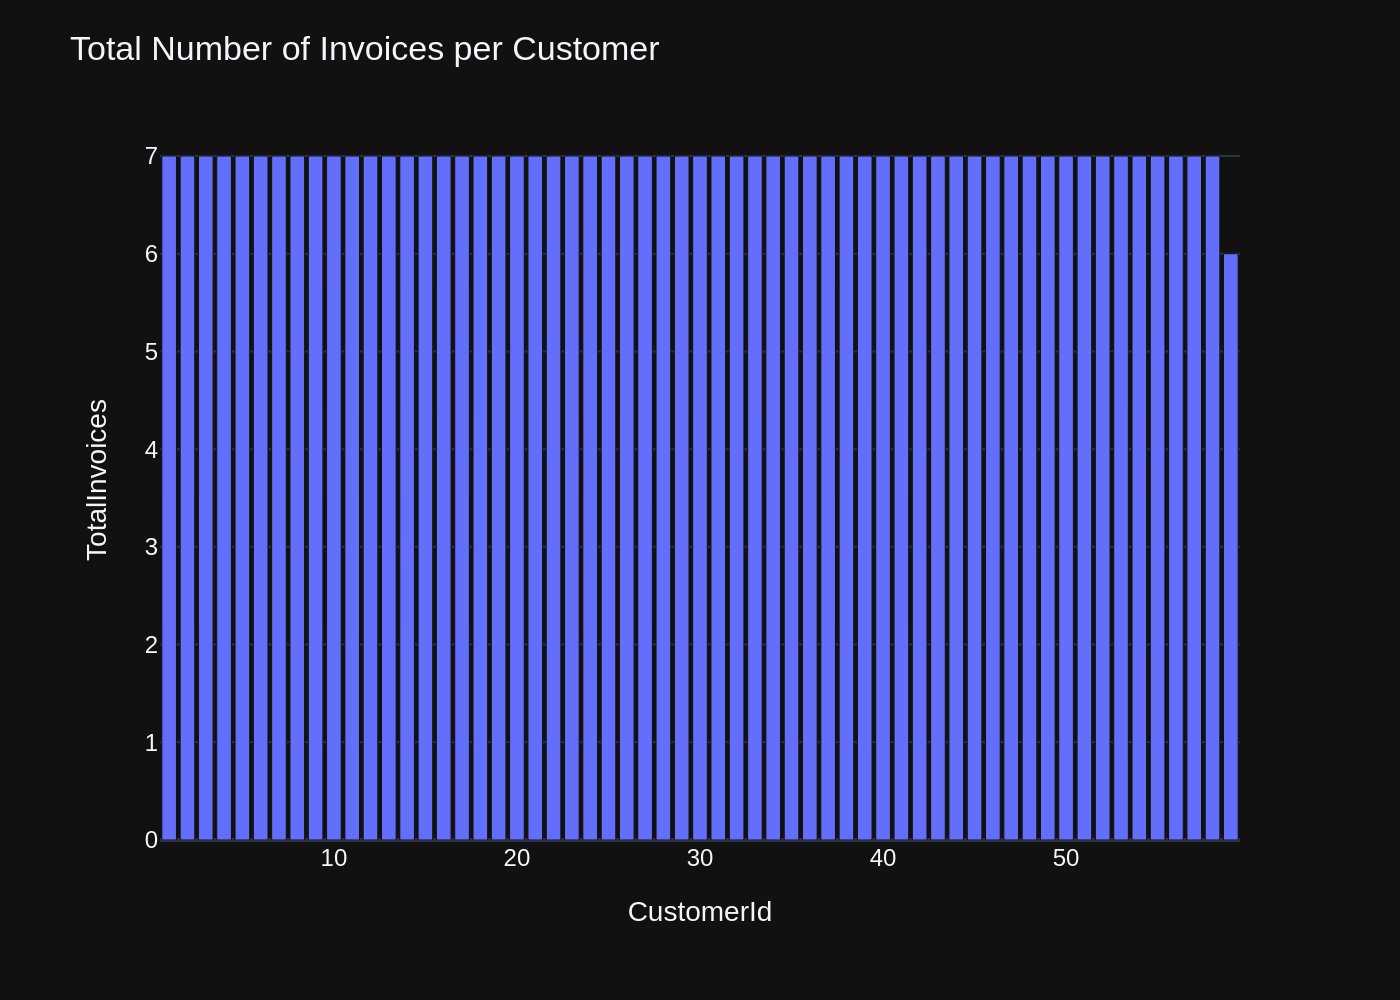

('SELECT c.CustomerId, COUNT(i.InvoiceId) AS TotalInvoices\nFROM "customers" c\nJOIN "invoices" i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId',
     CustomerId  TotalInvoices
 0            1              7
 1            2              7
 2            3              7
 3            4              7
 4            5              7
 5            6              7
 6            7              7
 7            8              7
 8            9              7
 9           10              7
 10          11              7
 11          12              7
 12          13              7
 13          14              7
 14          15              7
 15          16              7
 16          17              7
 17          18              7
 18          19              7
 19          20              7
 20          21              7
 21          22              7
 22          23              7
 23          24              7
 24          25              7
 25          26              7
 26      

In [23]:
question = """  
    Get the total number of invoices for each customer
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

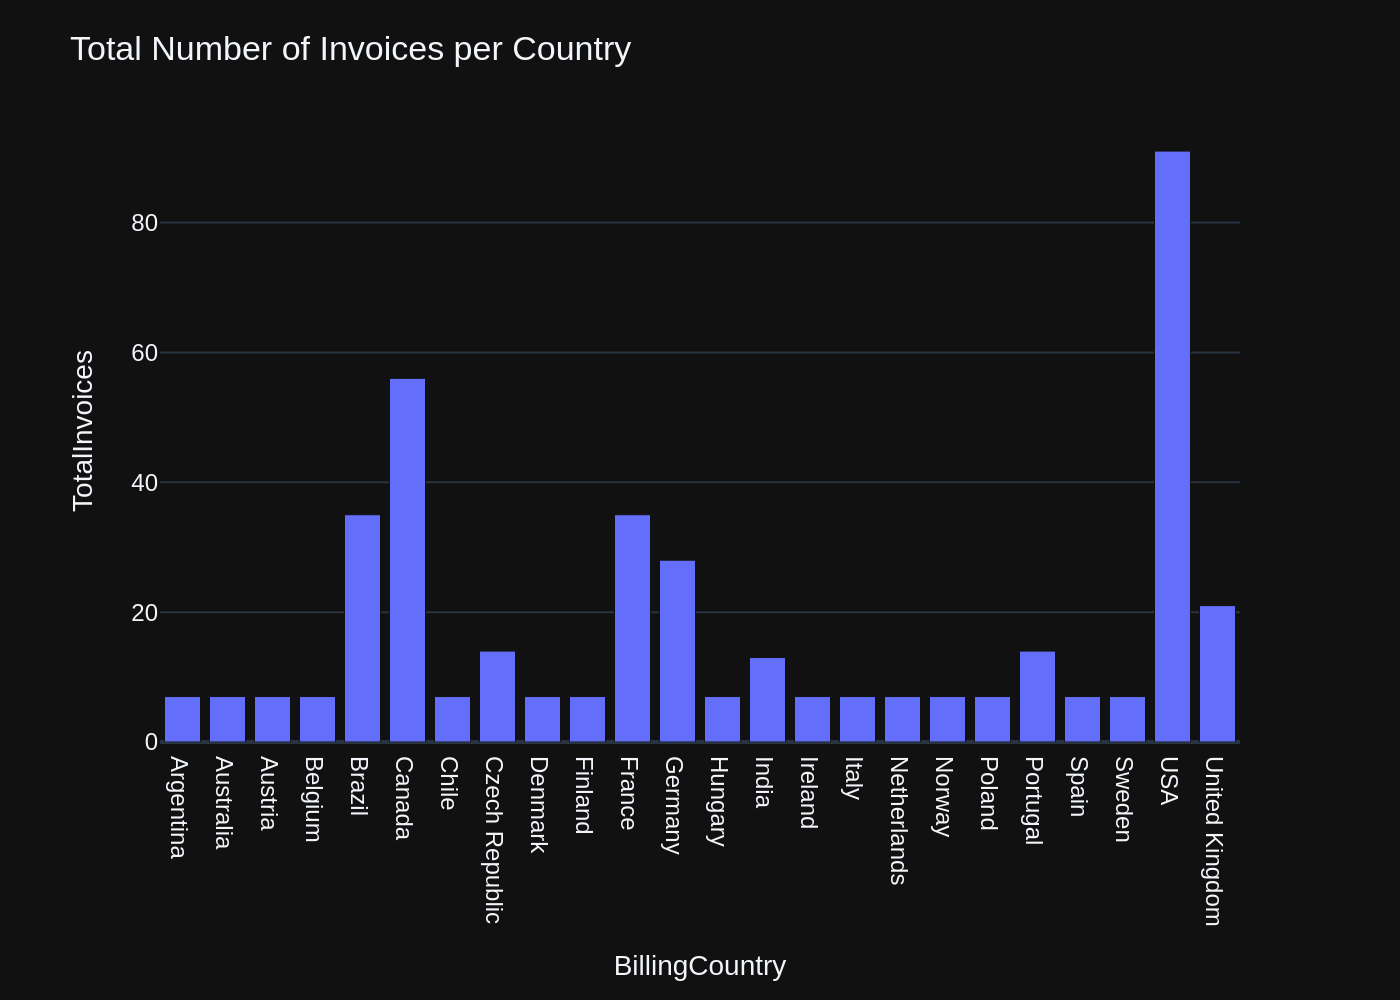

('SELECT BillingCountry, COUNT(i.InvoiceId) AS TotalInvoices\nFROM "invoices" i\nGROUP BY BillingCountry',
     BillingCountry  TotalInvoices
 0        Argentina              7
 1        Australia              7
 2          Austria              7
 3          Belgium              7
 4           Brazil             35
 5           Canada             56
 6            Chile              7
 7   Czech Republic             14
 8          Denmark              7
 9          Finland              7
 10          France             35
 11         Germany             28
 12         Hungary              7
 13           India             13
 14         Ireland              7
 15           Italy              7
 16     Netherlands              7
 17          Norway              7
 18          Poland              7
 19        Portugal             14
 20           Spain              7
 21          Sweden              7
 22             USA             91
 23  United Kingdom             21,
 Figure({
     'd

In [24]:
question = """  
    Find the total number of invoices per country:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n 

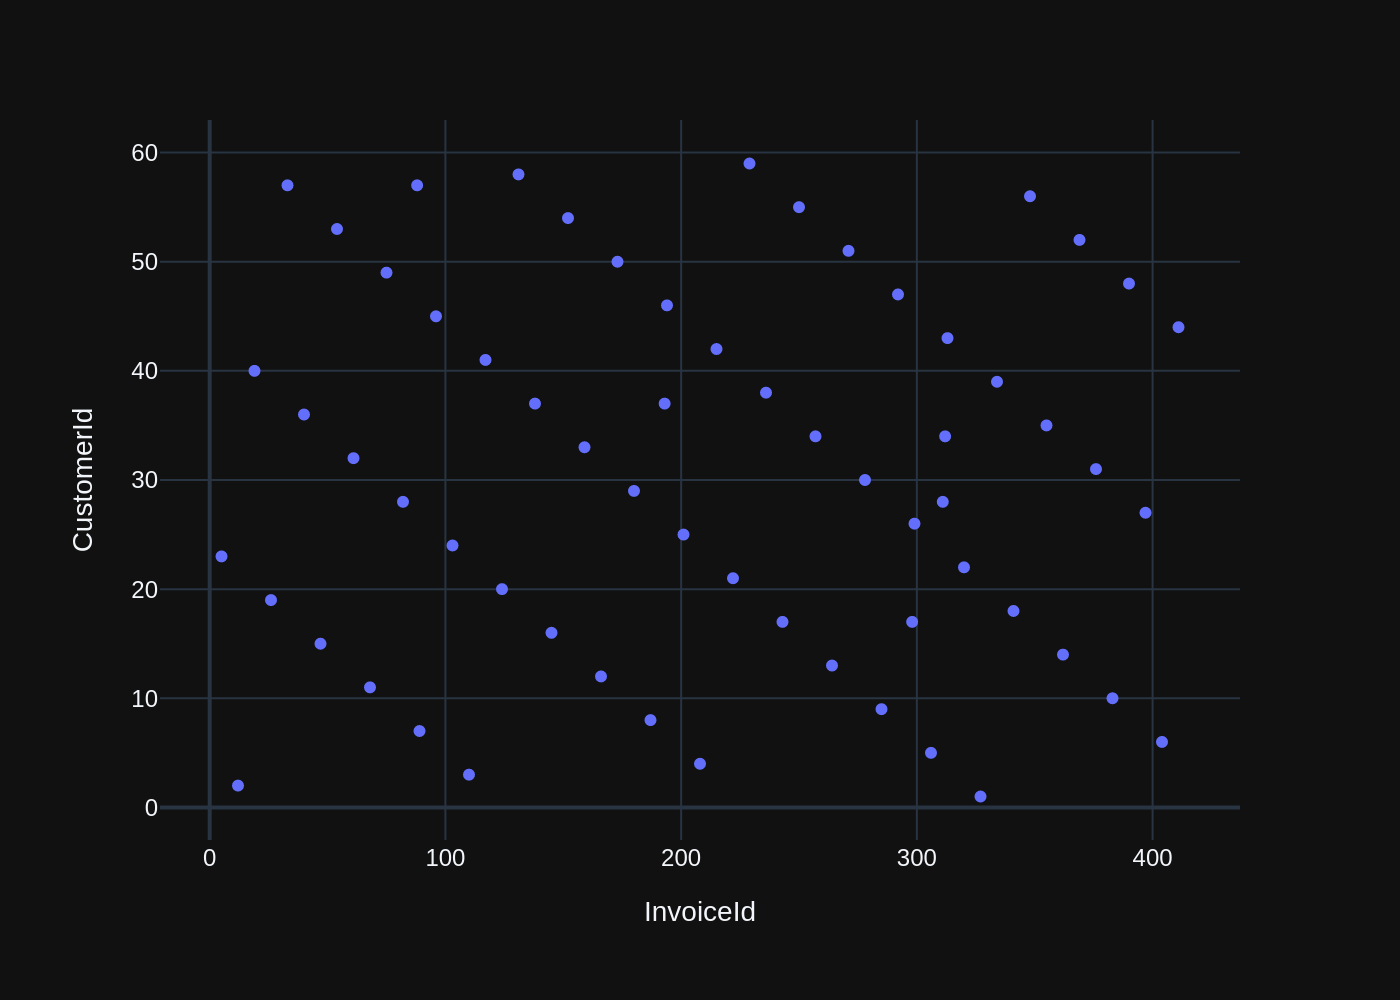

('SELECT * FROM "invoices" WHERE Total > 10',
     InvoiceId  CustomerId          InvoiceDate             BillingAddress  \
 0           5          23  2009-01-11 00:00:00            69 Salem Street   
 1          12           2  2009-02-11 00:00:00    Theodor-Heuss-Straße 34   
 2          19          40  2009-03-14 00:00:00             8, Rue Hanovre   
 3          26          19  2009-04-14 00:00:00            1 Infinite Loop   
 4          33          57  2009-05-15 00:00:00            Calle Lira, 198   
 ..        ...         ...                  ...                        ...   
 59        383          10  2013-08-12 00:00:00  Rua Dr. Falcão Filho, 155   
 60        390          48  2013-09-12 00:00:00      Lijnbaansgracht 120bg   
 61        397          27  2013-10-13 00:00:00            1033 N Park Ave   
 62        404           6  2013-11-13 00:00:00              Rilská 3174/6   
 63        411          44  2013-12-14 00:00:00            Porthaninkatu 9   
 
    BillingCity 

In [25]:
question = """  
    List all invoices with a total exceeding $10:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

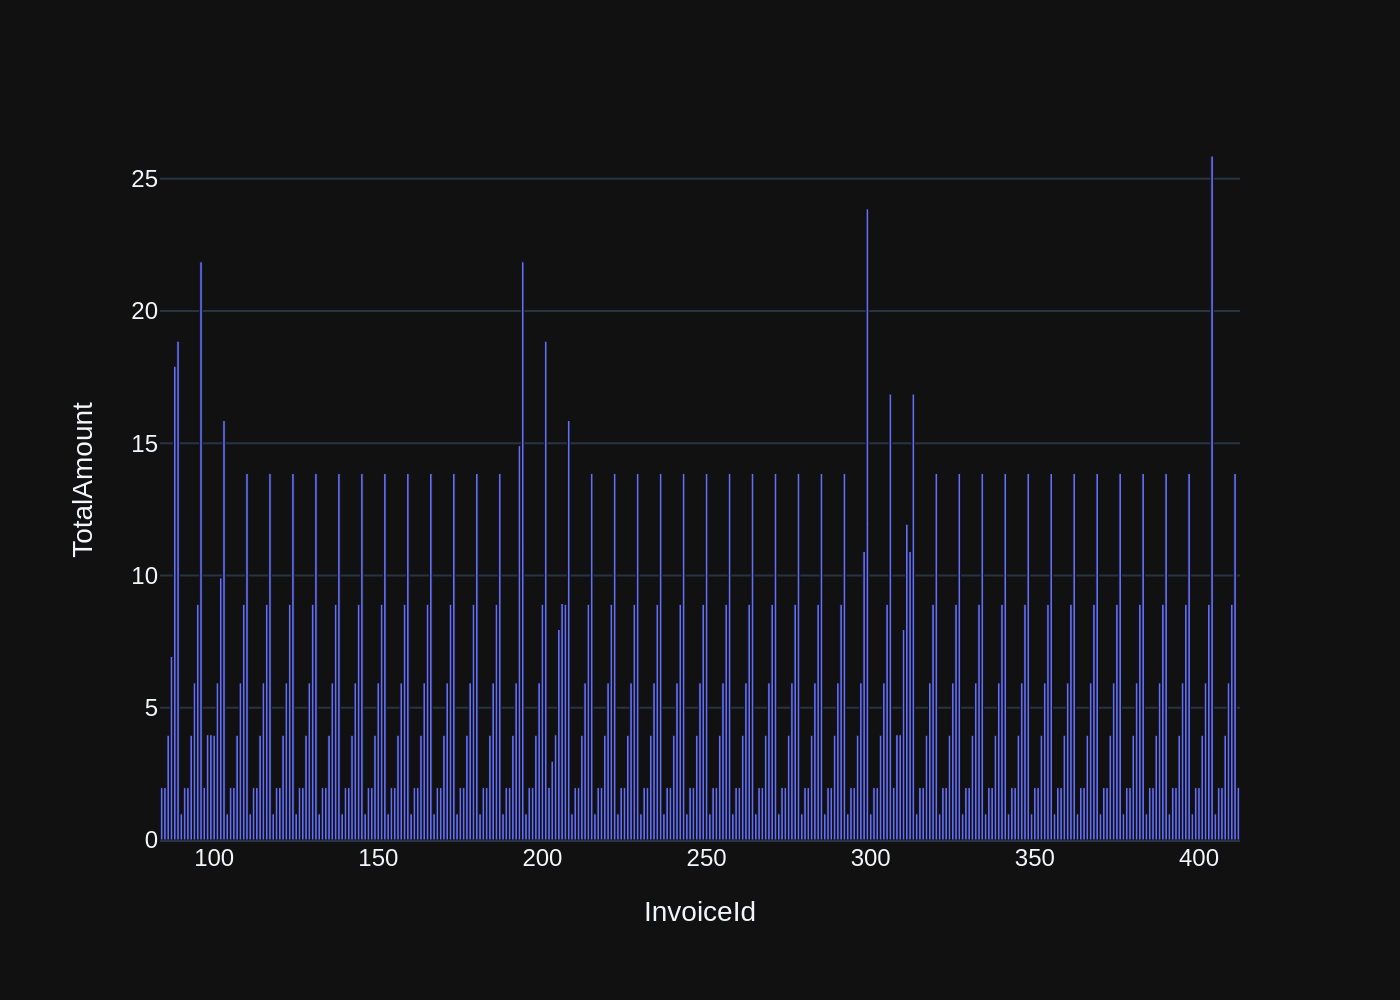

('SELECT i.InvoiceId, SUM(i.Total) AS TotalAmount\nFROM "invoices" i\nWHERE i.InvoiceDate > \'2010-01-01\'\nGROUP BY i.InvoiceId',
      InvoiceId  TotalAmount
 0           84         1.98
 1           85         1.98
 2           86         3.96
 3           87         6.94
 4           88        17.91
 ..         ...          ...
 324        408         3.96
 325        409         5.94
 326        410         8.91
 327        411        13.86
 328        412         1.99
 
 [329 rows x 2 columns],
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'InvoiceId=%{x}<br>TotalAmount=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([ 84,  85,  86, ..., 410

In [26]:
question = """  
    Find all invoices since 2010 and the total amount invoiced:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_EmployeeReportsTo ON "employees" (ReportsTo)\n\nCREATE TABLE "employees"\r\n(\r\n    EmployeeId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    FirstName NVARCHAR(20)  NOT NULL,\r\n    Title NVARCHAR(30),\r\n    ReportsTo INTEGER,\r\n    BirthDate DATETIME,\r\n    HireDate DATETIME,\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60),\r\n    FOREIGN KEY (ReportsTo) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY 

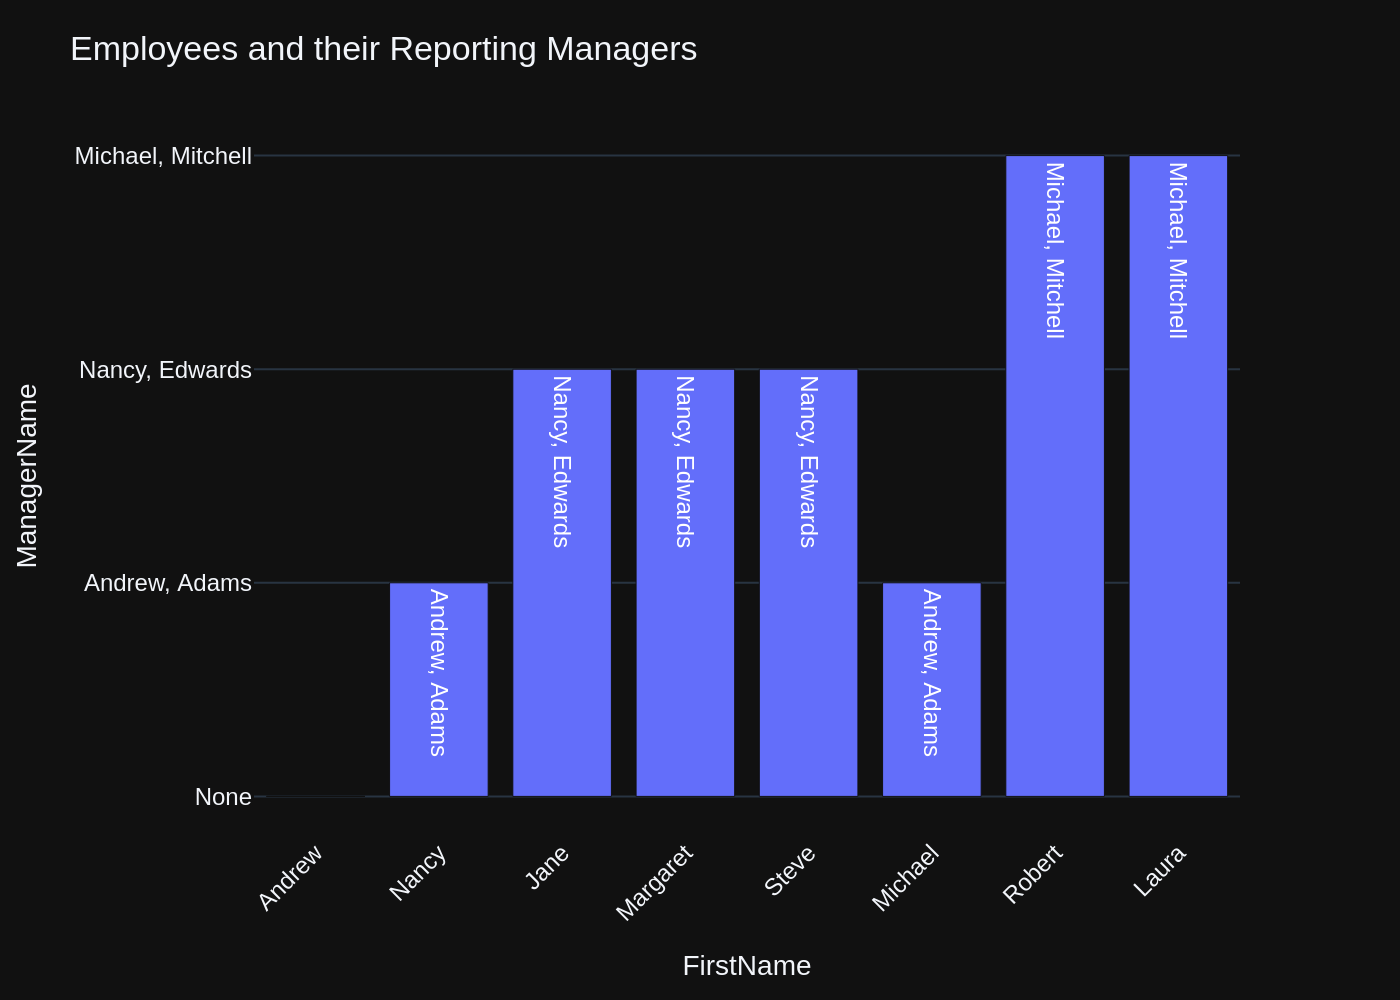

("SELECT e.FirstName, e.LastName, CASE WHEN e.ReportsTo IS NULL THEN 'None' ELSE (\n    SELECT e2.FirstName || ', ' || e2.LastName\n    FROM employees e2\n    WHERE e2.EmployeeId = e.ReportsTo\n) END AS ManagerName\nFROM employees e",
   FirstName  LastName        ManagerName
 0    Andrew     Adams               None
 1     Nancy   Edwards      Andrew, Adams
 2      Jane   Peacock     Nancy, Edwards
 3  Margaret      Park     Nancy, Edwards
 4     Steve   Johnson     Nancy, Edwards
 5   Michael  Mitchell      Andrew, Adams
 6    Robert      King  Michael, Mitchell
 7     Laura  Callahan  Michael, Mitchell,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'FirstName=%{x}<br>ManagerName=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
           

In [27]:
question = """  
    List all employees and their reporting manager's name (if any):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

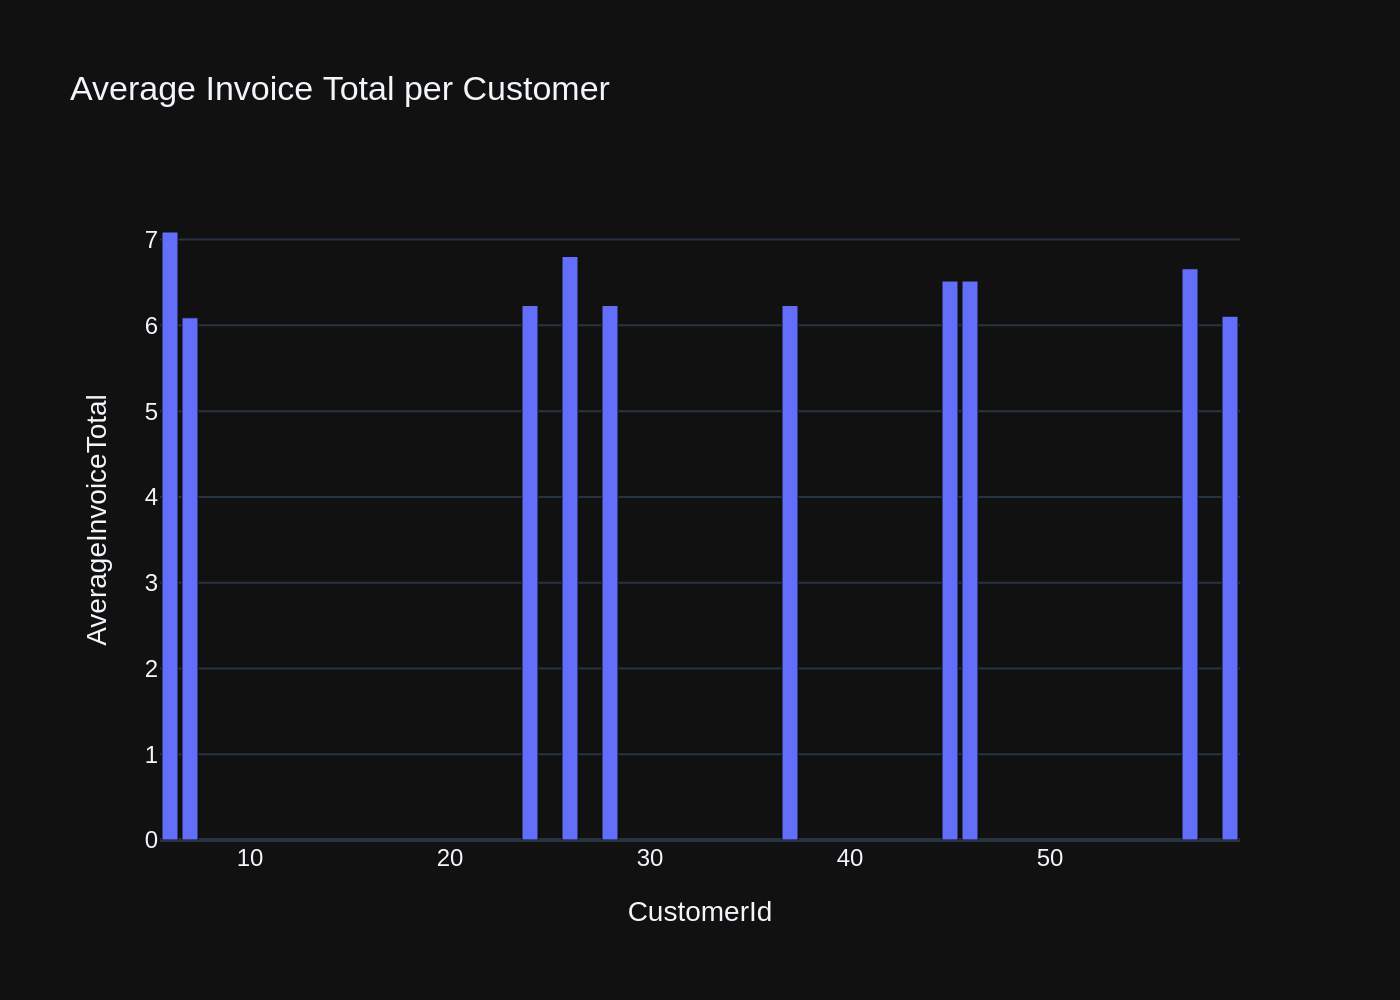

('SELECT c.CustomerId, AVG(i.Total) AS AverageInvoiceTotal\nFROM "customers" c\nJOIN "invoices" i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId\nORDER BY AverageInvoiceTotal DESC\nLIMIT 10',
    CustomerId  AverageInvoiceTotal
 0           6             7.088571
 1          26             6.802857
 2          57             6.660000
 3          45             6.517143
 4          46             6.517143
 5          24             6.231429
 6          28             6.231429
 7          37             6.231429
 8          59             6.106667
 9           7             6.088571,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'CustomerId=%{x}<br>AverageInvoiceTotal=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'text

In [28]:
question = """  
    Get the average invoice total for each customer:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_TrackAlbumId ON "tracks" (AlbumId)\n\nCREATE INDE

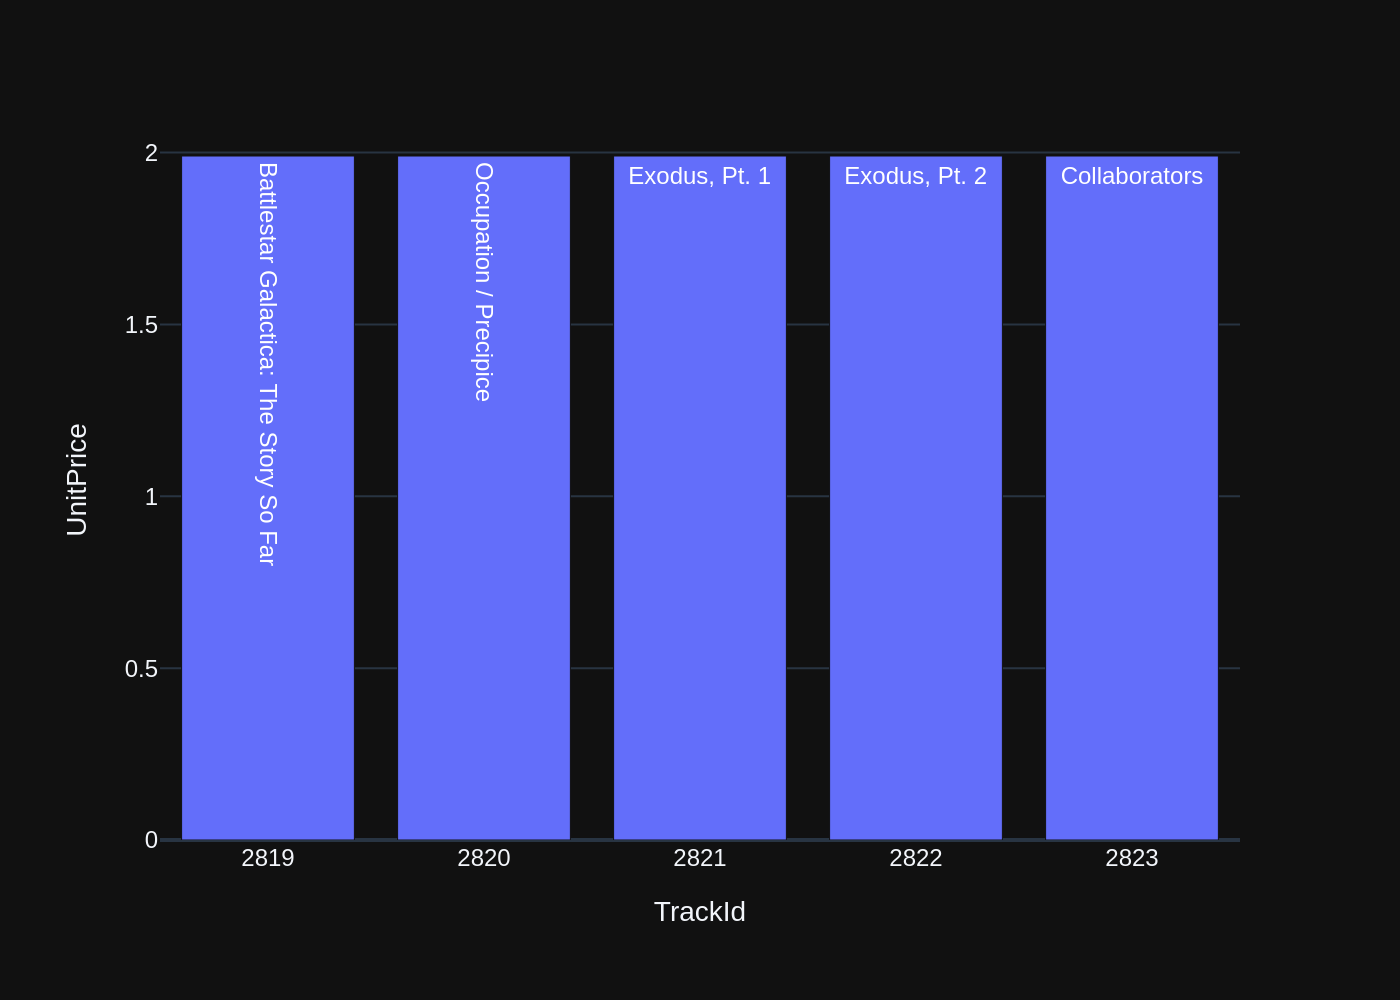

('SELECT t.TrackId, t.Name, t.UnitPrice\nFROM "tracks" t\nORDER BY t.UnitPrice DESC\nLIMIT 5\n-------------------------',
    TrackId                                    Name  UnitPrice
 0     2819  Battlestar Galactica: The Story So Far       1.99
 1     2820                  Occupation / Precipice       1.99
 2     2821                           Exodus, Pt. 1       1.99
 3     2822                           Exodus, Pt. 2       1.99
 4     2823                           Collaborators       1.99,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'TrackId=%{x}<br>UnitPrice=%{y}<br>Name=%{text}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'text': array(['Battlestar Galactica: The Story So Far', 'Occupation / Precipice',
              

In [29]:
question = """  
    Find the top 5 most expensive tracks (based on unit price):
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABL

Insert of existing embedding ID: 5b0b32a6-7f1d-544f-8c5b-9448cbc635ac-sql
Add of existing embedding ID: 5b0b32a6-7f1d-544f-8c5b-9448cbc635ac-sql


Ollama Response:
{'model': 'mistral:latest', 'created_at': '2024-06-14T10:39:57.814908671Z', 'message': {'role': 'assistant', 'content': 'SELECT g.Name, COUNT(t.GenreId) AS TotalTracks\nFROM "genres" g\nJOIN "tracks" t ON g.GenreId = t.GenreId\nGROUP BY g.Name\nORDER BY TotalTracks DESC\nLIMIT 5'}, 'done_reason': 'stop', 'done': True, 'total_duration': 92964135809, 'load_duration': 687316, 'prompt_eval_count': 1939, 'prompt_eval_duration': 80924181000, 'eval_count': 64, 'eval_duration': 11406013000}
SELECT g.Name, COUNT(t.GenreId) AS TotalTracks
FROM "genres" g
JOIN "tracks" t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY TotalTracks DESC
LIMIT 5
SELECT g.Name, COUNT(t.GenreId) AS TotalTracks
FROM "genres" g
JOIN "tracks" t ON g.GenreId = t.GenreId
GROUP BY g.Name
ORDER BY TotalTracks DESC
LIMIT 5
                 Name  TotalTracks
0                Rock         1297
1               Latin          579
2               Metal          374
3  Alternative & Punk          332
4           

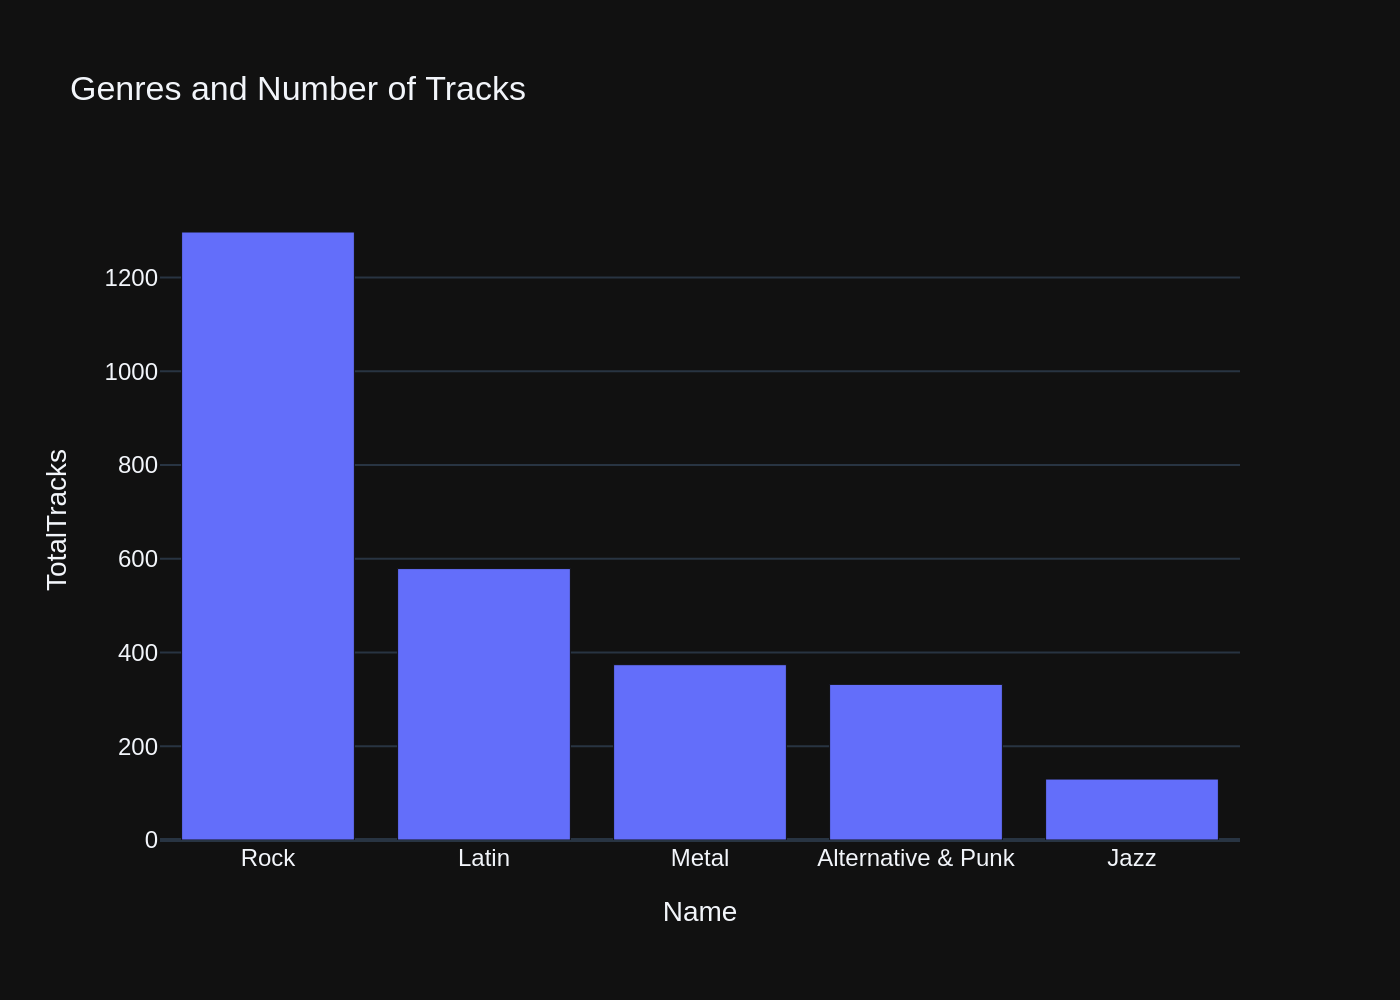

('SELECT g.Name, COUNT(t.GenreId) AS TotalTracks\nFROM "genres" g\nJOIN "tracks" t ON g.GenreId = t.GenreId\nGROUP BY g.Name\nORDER BY TotalTracks DESC\nLIMIT 5',
                  Name  TotalTracks
 0                Rock         1297
 1               Latin          579
 2               Metal          374
 3  Alternative & Punk          332
 4                Jazz          130,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>TotalTracks=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array(['Rock', 'Latin', 'Metal', 'Alternative & Punk', 'Jazz'], dtype=object),
               'xaxis': 'x',
               'y': array([1297,  579,  374,  332,  1

In [30]:
question = """  
    List all genres and the number of tracks in each genre:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_TrackGenreId ON "tracks" (GenreId)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDE

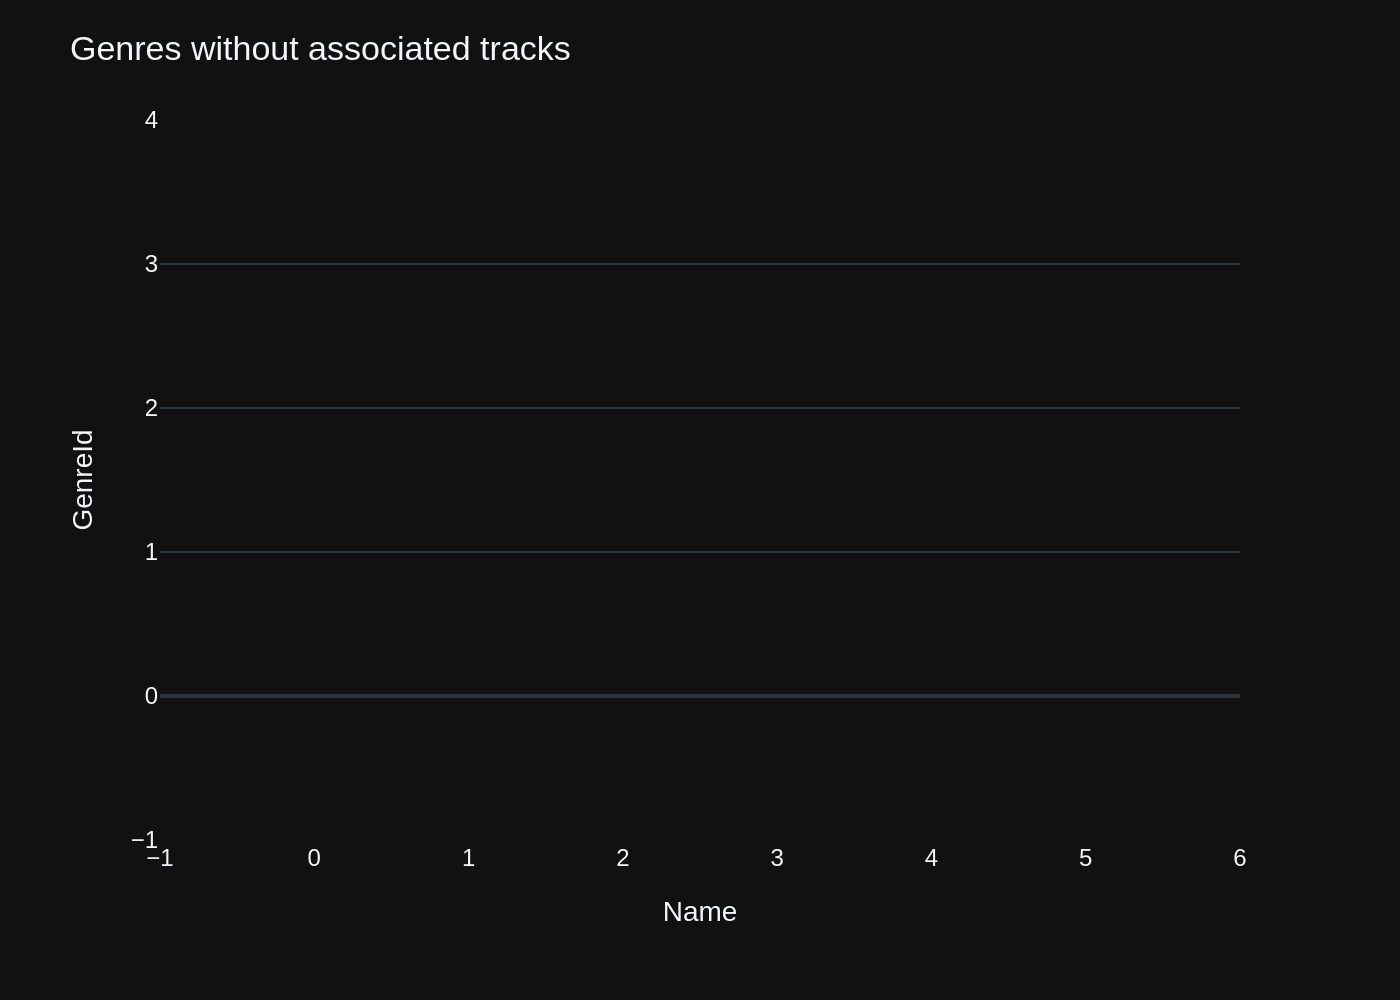

('SELECT g.GenreId, g.Name\nFROM "genres" g\nLEFT JOIN "tracks" t ON g.GenreId = t.GenreId\nWHERE t.TrackId IS NULL\nGROUP BY g.GenreId, g.Name\nHAVING COUNT(t.TrackId) = 0',
 Empty DataFrame
 Columns: [GenreId, Name]
 Index: [],
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'Name=%{x}<br>GenreId=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([], dtype=object),
               'xaxis': 'x',
               'y': array([], dtype=object),
               'yaxis': 'y'}],
     'layout': {'barmode': 'relative',
                'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'title': {

In [31]:
question = """  
    Get all genres that do not have any tracks associated with them:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVAR

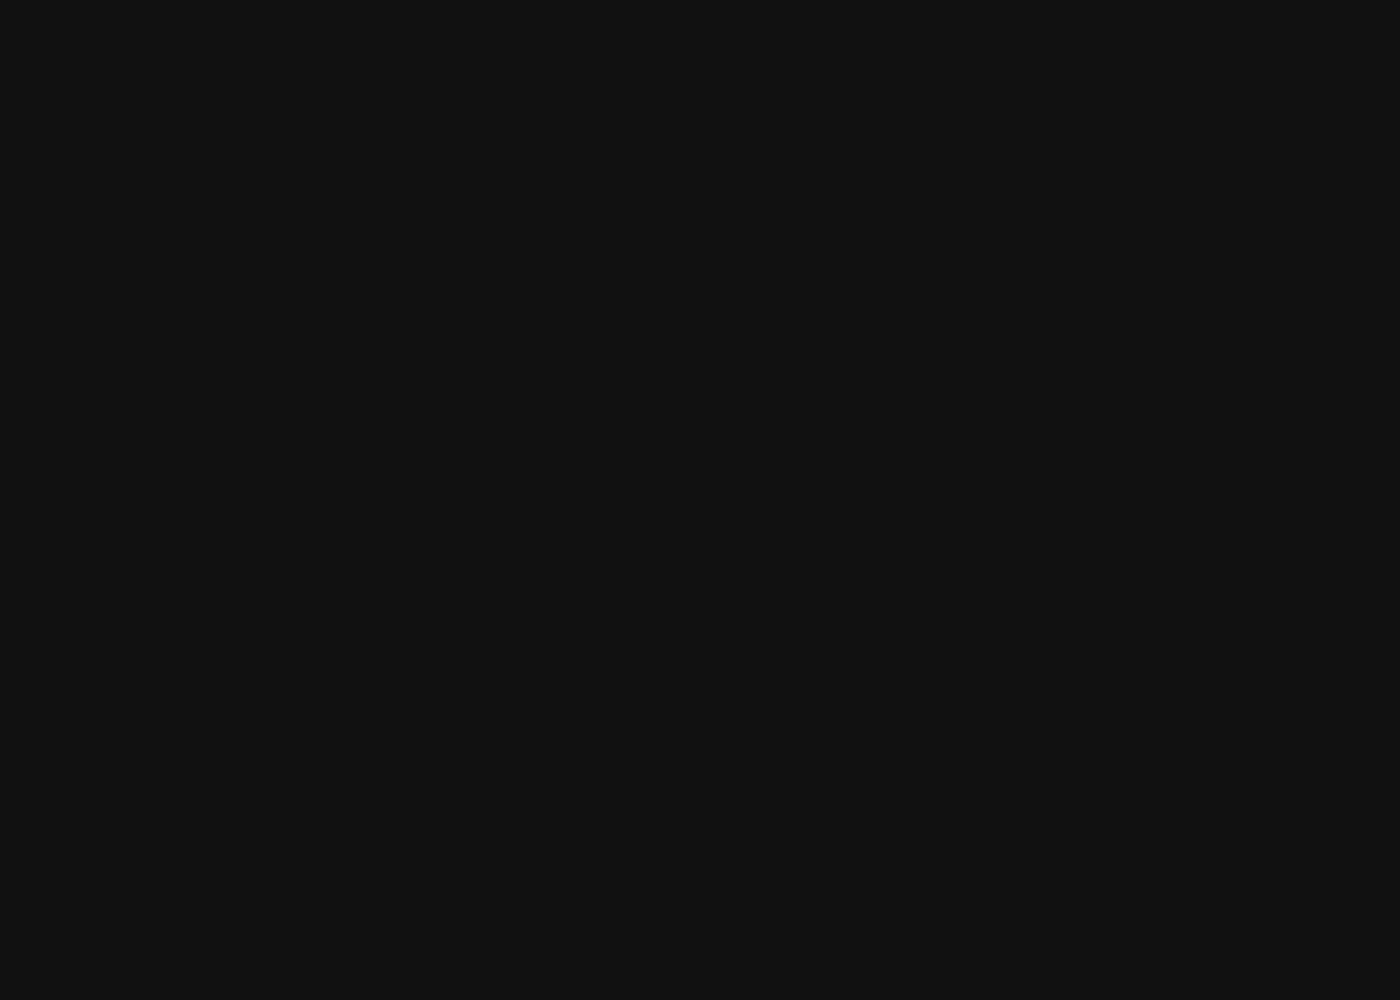

('SELECT c.CustomerId, c.FirstName, c.LastName\nFROM "customers" c\nLEFT JOIN "invoices" i ON c.CustomerId = i.CustomerId\nWHERE i.InvoiceId IS NULL',
 Empty DataFrame
 Columns: [CustomerId, FirstName, LastName]
 Index: [],
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'CustomerId=%{label}<extra></extra>',
               'labels': array([], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
 }))

In [32]:
question = """  
    List all customers who have not placed any orders:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "albums"\r\n(\r\n    AlbumId INTEGER PRIMARY KEY AUTO

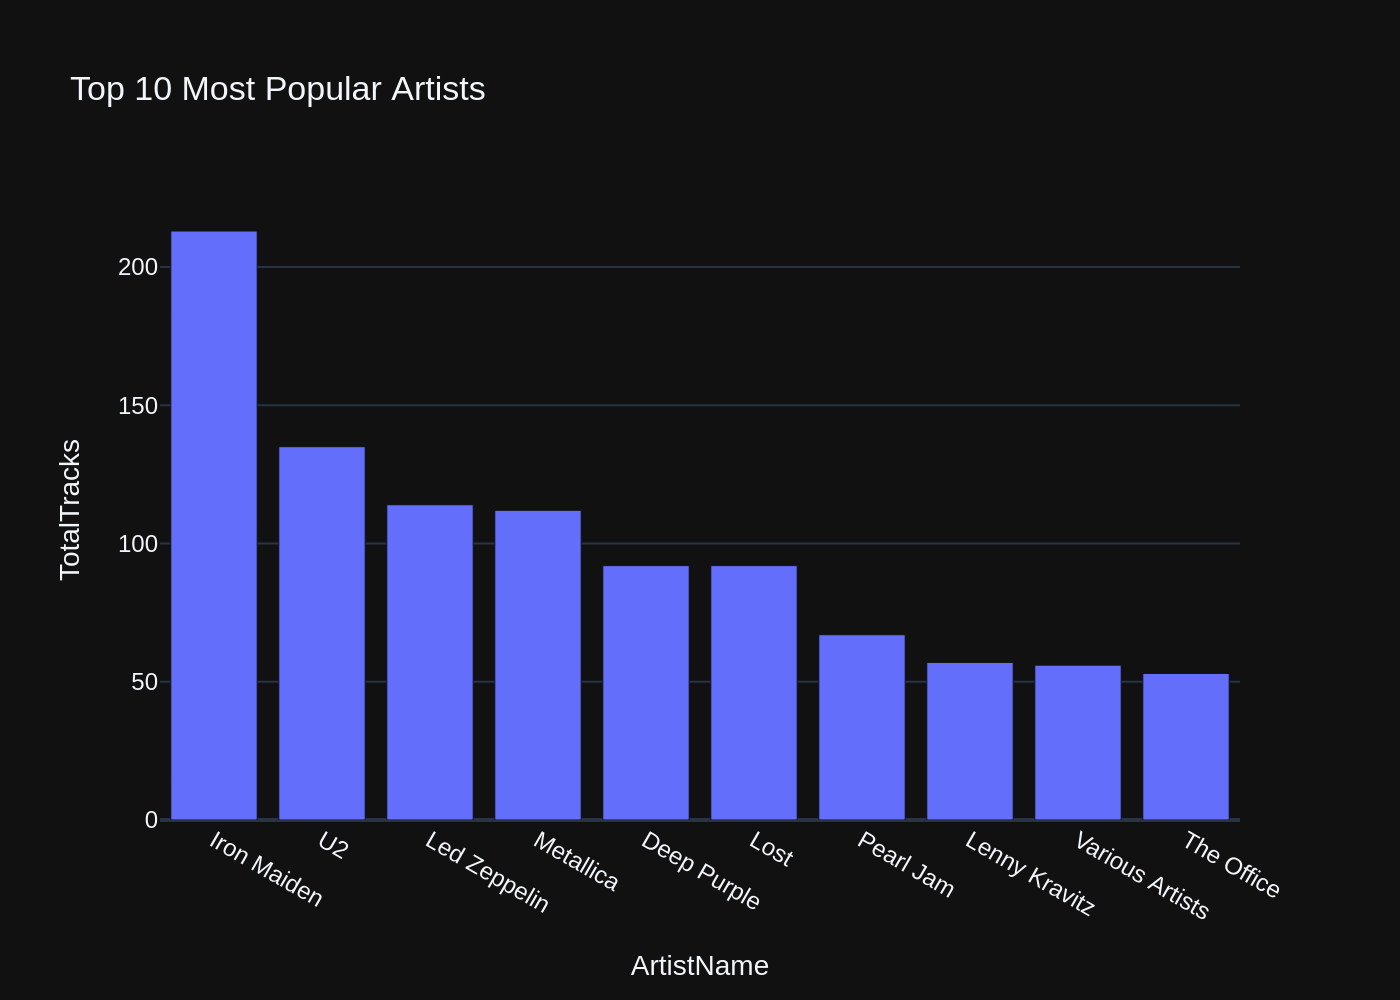

('SELECT a.ArtistId, a.Name AS ArtistName, COUNT(t.TrackId) AS TotalTracks\nFROM "artists" a\nJOIN "albums" al ON a.ArtistId = al.ArtistId\nJOIN "tracks" t ON al.AlbumId = t.AlbumId\nGROUP BY a.ArtistId, a.Name\nORDER BY TotalTracks DESC\nLIMIT 10',
    ArtistId       ArtistName  TotalTracks
 0        90      Iron Maiden          213
 1       150               U2          135
 2        22     Led Zeppelin          114
 3        50        Metallica          112
 4        58      Deep Purple           92
 5       149             Lost           92
 6       118        Pearl Jam           67
 7       100    Lenny Kravitz           57
 8        21  Various Artists           56
 9       156       The Office           53,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'ArtistName=%{x}<br>TotalTracks=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
     

In [33]:
question = """ 
    There are 3 tables: artists, albums and tracks, where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    Can you find the top 10 most popular artists based on the number of tracks
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_CustomerSupportRepId ON "customers" (SupportRepId)\n\nCREATE TABLE "customers"\r\n(\r\n    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    FirstName NVARCHAR(40)  NOT NULL,\r\n    LastName NVARCHAR(20)  NOT NULL,\r\n    Company NVARCHAR(80),\r\n    Address NVARCHAR(70),\r\n    City NVARCHAR(40),\r\n    State NVARCHAR(40),\r\n    Country NVARCHAR(40),\r\n    PostalCode NVARCHAR(10),\r\n    Phone NVARCHAR(24),\r\n    Fax NVARCHAR(24),\r\n    Email NVARCHAR(60)  NOT NULL,\r\n    SupportRepId INTEGER,\r\n    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n

Insert of existing embedding ID: 584873f8-1904-50f1-8f80-7ccf08059264-sql
Add of existing embedding ID: 584873f8-1904-50f1-8f80-7ccf08059264-sql


Ollama Response:
{'model': 'mistral:latest', 'created_at': '2024-06-14T10:49:50.501798484Z', 'message': {'role': 'assistant', 'content': 'SELECT c.Email, c.Country\nFROM "customers" c\nWHERE c.Country = \'Canada\';'}, 'done_reason': 'stop', 'done': True, 'total_duration': 90298836967, 'load_duration': 838721, 'prompt_eval_count': 2002, 'prompt_eval_duration': 84931851000, 'eval_count': 27, 'eval_duration': 4780482000}
SELECT c.Email, c.Country
FROM "customers" c
WHERE c.Country = 'Canada';
Output from LLM: SELECT c.Email, c.Country
FROM "customers" c
WHERE c.Country = 'Canada'; 
Extracted SQL: SELECT c.Email, c.Country
FROM "customers" c
WHERE c.Country = 'Canada'
SELECT c.Email, c.Country
FROM "customers" c
WHERE c.Country = 'Canada'
                    Email Country
0     ftremblay@gmail.com  Canada
1      mphilips12@shaw.ca  Canada
2     jenniferp@rogers.ca  Canada
3        robbrown@shaw.ca  Canada
4     edfrancis@yachoo.ca  Canada
5    marthasilk@gmail.com  Canada
6  aaronmitchell@

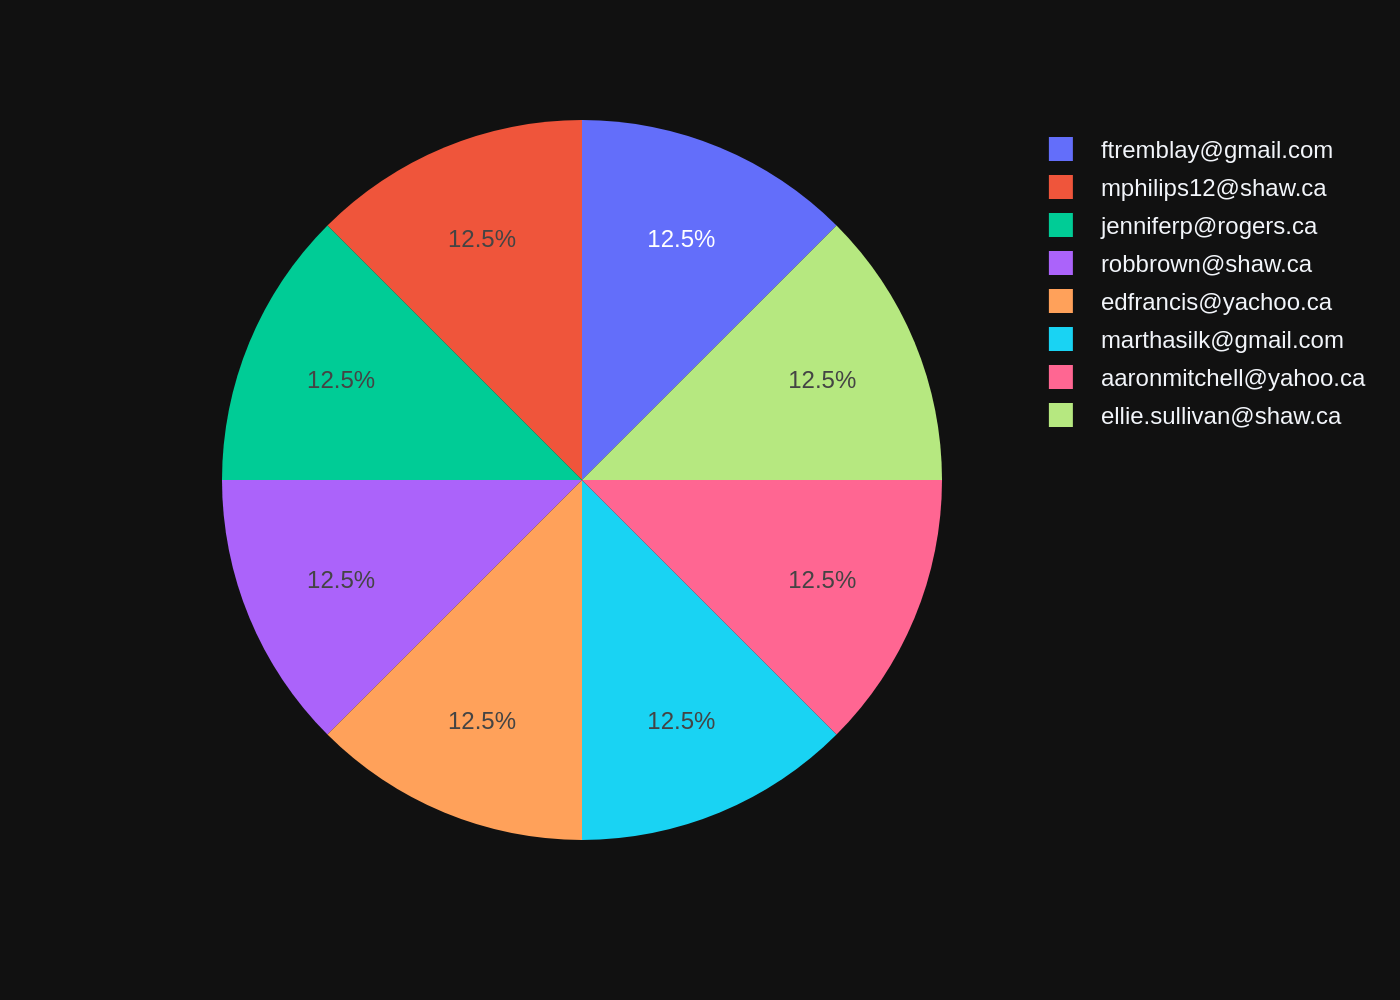

('SELECT c.Email, c.Country\nFROM "customers" c\nWHERE c.Country = \'Canada\'',
                     Email Country
 0     ftremblay@gmail.com  Canada
 1      mphilips12@shaw.ca  Canada
 2     jenniferp@rogers.ca  Canada
 3        robbrown@shaw.ca  Canada
 4     edfrancis@yachoo.ca  Canada
 5    marthasilk@gmail.com  Canada
 6  aaronmitchell@yahoo.ca  Canada
 7  ellie.sullivan@shaw.ca  Canada,
 Figure({
     'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
               'hovertemplate': 'Email=%{label}<extra></extra>',
               'labels': array(['ftremblay@gmail.com', 'mphilips12@shaw.ca', 'jenniferp@rogers.ca',
                                'robbrown@shaw.ca', 'edfrancis@yachoo.ca', 'marthasilk@gmail.com',
                                'aaronmitchell@yahoo.ca', 'ellie.sullivan@shaw.ca'], dtype=object),
               'legendgroup': '',
               'name': '',
               'showlegend': True,
               'type': 'pie'}],
     'layout': {'legend': {'tracegroupgap

In [34]:
question = """  
     List all customers from Canada and their email addresses:
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_InvoiceCustomerId ON "invoices" (CustomerId)\n\nCREATE INDEX IFK_InvoiceLineInvoiceId ON "invoice_items" (InvoiceId)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Invo

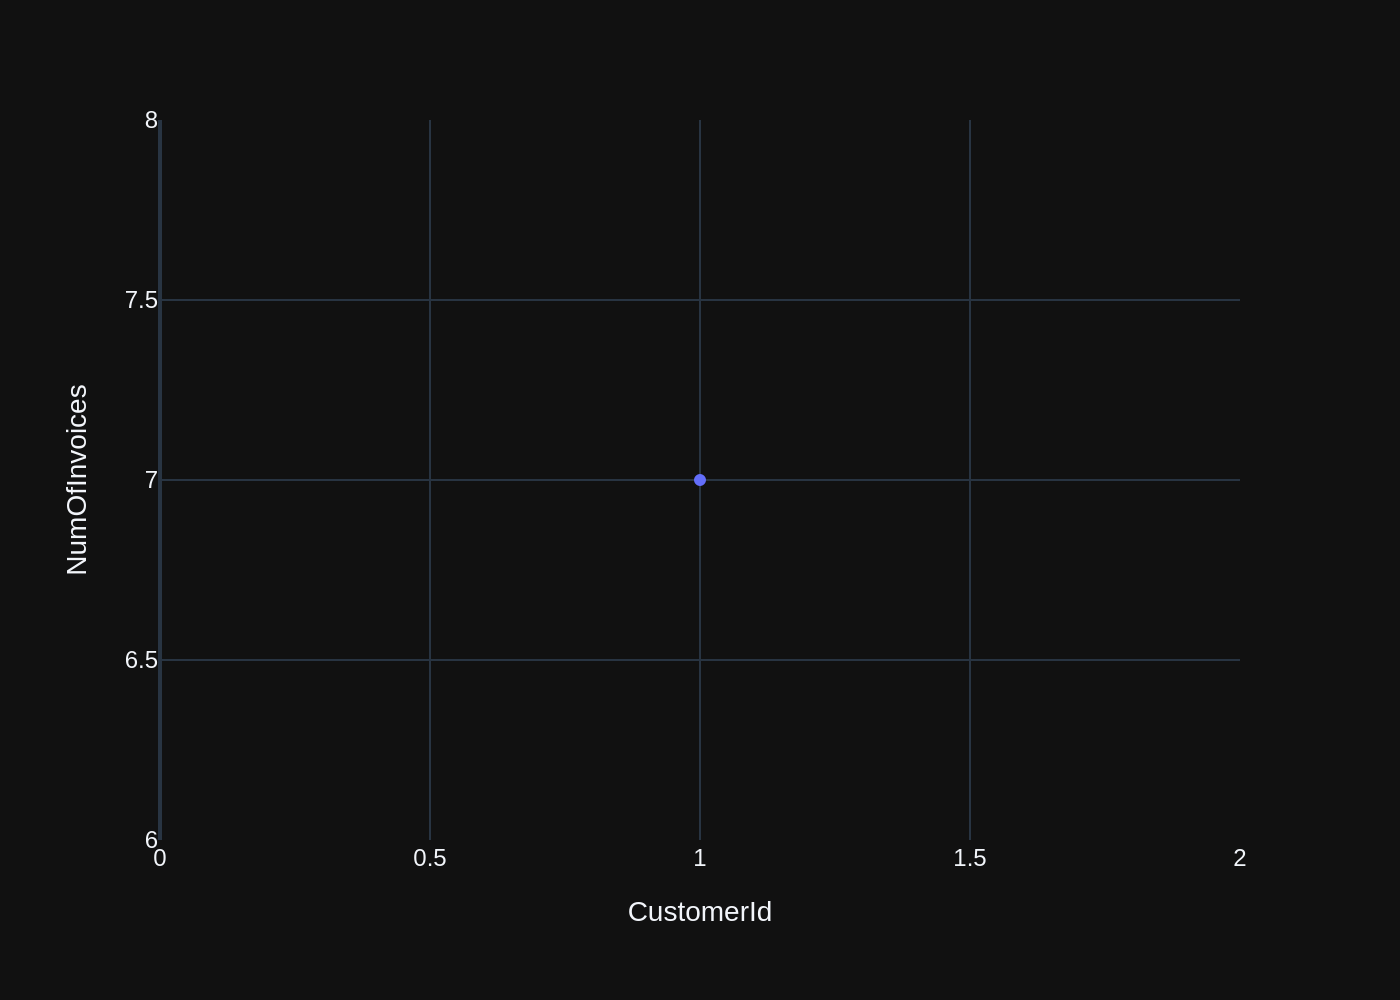

('SELECT CustomerId, COUNT(InvoiceId) as NumOfInvoices\nFROM "invoices"\nGROUP BY CustomerId\nORDER BY NumOfInvoices DESC\nLIMIT 1',
    CustomerId  NumOfInvoices
 0           1              7,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>NumOfInvoices=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1]),
               'xaxis': 'x',
               'y': array([7]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
                'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'CustomerId'}},
                'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'NumOfInvoices'}}}


In [35]:
question = """  
     Find the customer with the most invoices 
"""

vn.ask(question=question)

### Advanced SQL questions

In [36]:
question = """  
     Find the customer who bought the most albums in total quantity (across all invoices): 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRI

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r\n    FOREIGN KEY (InvoiceId) REFERENCES "invoices" (InvoiceId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,

Insert of existing embedding ID: 0e1a2b7b-d65e-53de-b839-edb7afcf4ab1-sql
Add of existing embedding ID: 0e1a2b7b-d65e-53de-b839-edb7afcf4ab1-sql


Ollama Response:
{'model': 'mistral:latest', 'created_at': '2024-06-14T10:55:35.177955387Z', 'message': {'role': 'assistant', 'content': 'SELECT i.CustomerId, COUNT(ii.TrackId) AS TotalAlbums\nFROM "invoices" i\nJOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId\nGROUP BY i.CustomerId\nORDER BY TotalAlbums DESC\nLIMIT 5'}, 'done_reason': 'stop', 'done': True, 'total_duration': 93927241601, 'load_duration': 1010606, 'prompt_eval_count': 1893, 'prompt_eval_duration': 80529455000, 'eval_count': 70, 'eval_duration': 12561624000}
SELECT i.CustomerId, COUNT(ii.TrackId) AS TotalAlbums
FROM "invoices" i
JOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId
GROUP BY i.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5
SELECT i.CustomerId, COUNT(ii.TrackId) AS TotalAlbums
FROM "invoices" i
JOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId
GROUP BY i.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5
   CustomerId  TotalAlbums
0           1           38
1           2           38
2           3        

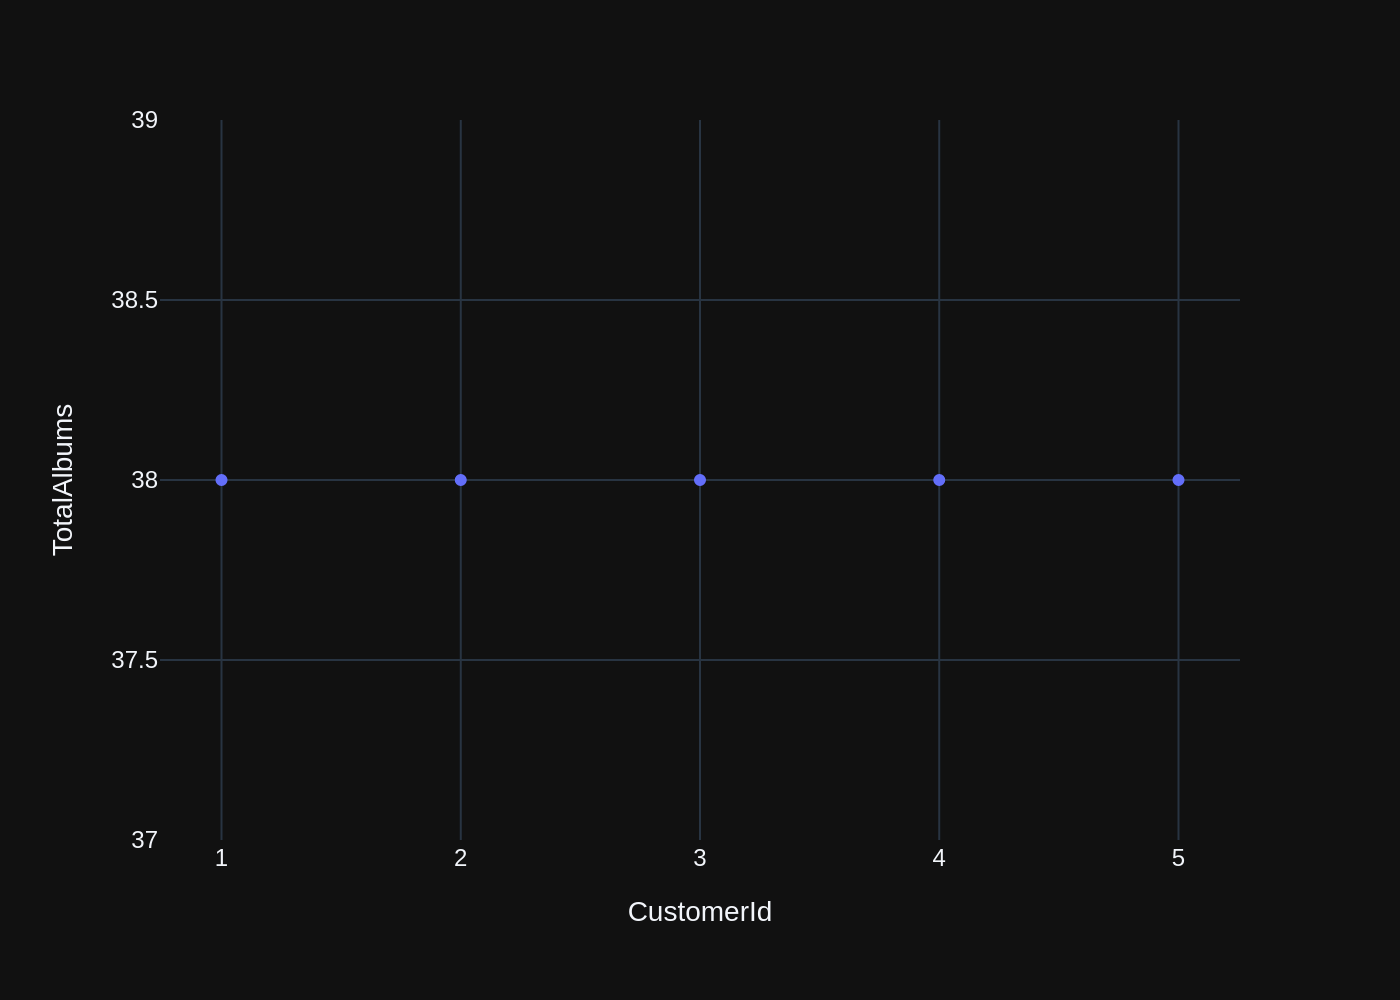

('SELECT i.CustomerId, COUNT(ii.TrackId) AS TotalAlbums\nFROM "invoices" i\nJOIN "invoice_items" ii ON i.InvoiceId = ii.InvoiceId\nGROUP BY i.CustomerId\nORDER BY TotalAlbums DESC\nLIMIT 5',
    CustomerId  TotalAlbums
 0           1           38
 1           2           38
 2           3           38
 3           4           38
 4           5           38,
 Figure({
     'data': [{'hovertemplate': 'CustomerId=%{x}<br>TotalAlbums=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'symbol': 'circle'},
               'mode': 'markers',
               'name': '',
               'orientation': 'v',
               'showlegend': False,
               'type': 'scatter',
               'x': array([1, 2, 3, 4, 5]),
               'xaxis': 'x',
               'y': array([38, 38, 38, 38, 38]),
               'yaxis': 'y'}],
     'layout': {'legend': {'tracegroupgap': 0},
                'margin': {'t': 60},
                'template': '...',
    

In [37]:
question = """  
    Hint: album quantity is found in invoice_items, 
    
    Find the top 5 customers who bought the most albums in total quantity (across all invoices):
"""

vn.ask(question=question)

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "invoices"\r\n(\r\n    InvoiceId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    CustomerId INTEGER  NOT NULL,\r\n    InvoiceDate DATETIME  NOT NULL,\r\n    BillingAddress NVARCHAR(70),\r\n    BillingCity NVARCHAR(40),\r\n    BillingState NVARCHAR(40),\r\n    BillingCountry NVARCHAR(40),\r\n    BillingPostalCode NVARCHAR(10),\r\n    Total NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (CustomerId) REFERENCES "customers" (CustomerId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "invoice_items"\r\n(\r\n    InvoiceLineId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    InvoiceId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    Quantity INTEGER  NOT NULL,\r

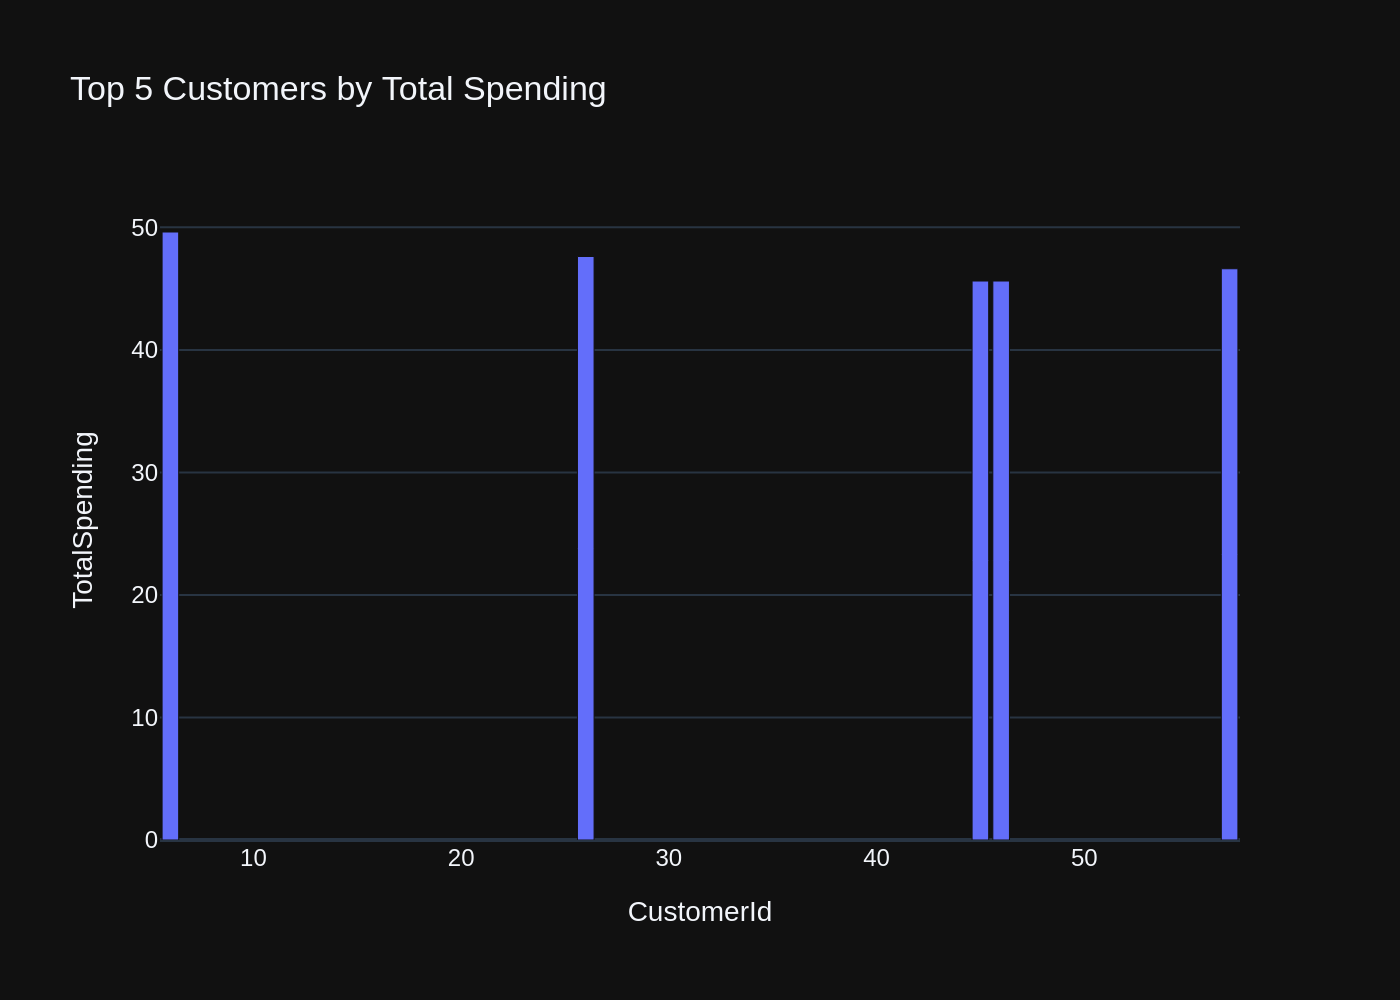

('SELECT c.CustomerId, SUM(i.Total) AS TotalSpending\nFROM "customers" c\nJOIN "invoices" i ON c.CustomerId = i.CustomerId\nGROUP BY c.CustomerId\nORDER BY TotalSpending DESC\nLIMIT 5',
    CustomerId  TotalSpending
 0           6          49.62
 1          26          47.62
 2          57          46.62
 3          45          45.62
 4          46          45.62,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'CustomerId=%{x}<br>TotalSpending=%{y}<extra></extra>',
               'legendgroup': '',
               'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
               'name': '',
               'offsetgroup': '',
               'orientation': 'v',
               'showlegend': False,
               'textposition': 'auto',
               'type': 'bar',
               'x': array([ 6, 26, 57, 45, 46]),
               'xaxis': 'x',
               'y': array([49.62, 47.62, 46.62, 45.62, 45.62]),
               'yaxis': 'y'}],
     'layout'

In [38]:
question = """  
     Find the top 5 customers who spent the most money overall, 
     
     Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE INDEX IFK_PlaylistTrackTrackId ON "playlist_track" (TrackId)\n\nCREATE TABLE "playlists"\r\n(\r\n    PlaylistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(120)\r\n)\n\nCREATE TABLE "playlist_track"\r\n(\r\n    PlaylistId INTEGER  NOT NULL,\r\n    TrackId INTEGER  NOT NULL,\r\n    CONSTRAINT PK_PlaylistTrack PRIMARY KEY  (PlaylistId, TrackId),\r\n    FOREIGN KEY (PlaylistId) REFERENCES "playlists" (PlaylistId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (TrackId) REFERENCES "tracks" (TrackId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\

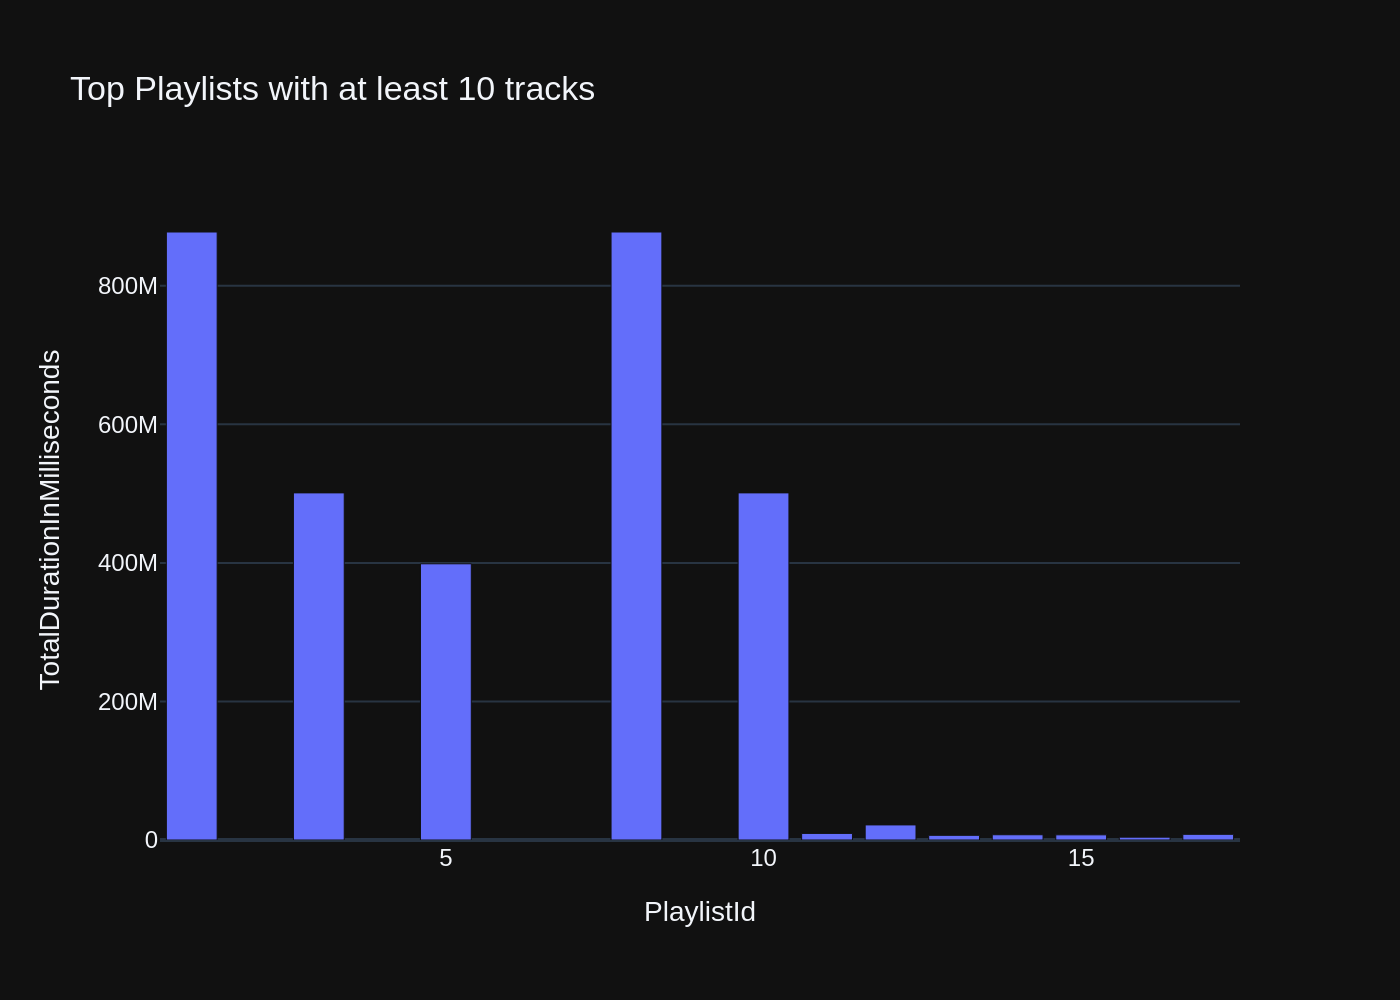

('SELECT p.PlaylistId, SUM(t.Milliseconds) AS TotalDurationInMilliseconds\nFROM "playlists" p\nJOIN "playlist_track" pt ON p.PlaylistId = pt.PlaylistId\nJOIN "tracks" t ON pt.TrackId = t.TrackId\nGROUP BY p.PlaylistId\nHAVING COUNT(pt.PlaylistId) >= 10\nORDER BY TotalDurationInMilliseconds DESC',
     PlaylistId  TotalDurationInMilliseconds
 0            1                    877683083
 1            8                    877683083
 2            3                    501094957
 3           10                    501094957
 4            5                    398705153
 5           12                     21770592
 6           11                      9486559
 7           17                      8206312
 8           14                      7575051
 9           15                      7439811
 10          13                      6755730
 11          16                      4122018,
 Figure({
     'data': [{'alignmentgroup': 'True',
               'hovertemplate': 'PlaylistId=%{x}<br>TotalDuration

In [39]:
question = """  
     Get all playlists containing at least 10 tracks and the total duration of those tracks:
"""

vn.ask(question=question)

In [40]:
question = """  
     Identify artists who have albums with tracks appearing in multiple genres:


"""

vn.ask(question=question)

Number of requested results 10 is greater than number of elements in index 1, updating n_results = 1


[{'role': 'system', 'content': 'You are a SQLite expert. Please help to generate a SQL query to answer the question. Your response should ONLY be based on the given context and follow the response guidelines and format instructions. \n===Tables \nCREATE TABLE "tracks"\r\n(\r\n    TrackId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,\r\n    Name NVARCHAR(200)  NOT NULL,\r\n    AlbumId INTEGER,\r\n    MediaTypeId INTEGER  NOT NULL,\r\n    GenreId INTEGER,\r\n    Composer NVARCHAR(220),\r\n    Milliseconds INTEGER  NOT NULL,\r\n    Bytes INTEGER,\r\n    UnitPrice NUMERIC(10,2)  NOT NULL,\r\n    FOREIGN KEY (AlbumId) REFERENCES "albums" (AlbumId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (GenreId) REFERENCES "genres" (GenreId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION,\r\n    FOREIGN KEY (MediaTypeId) REFERENCES "media_types" (MediaTypeId) \r\n\t\tON DELETE NO ACTION ON UPDATE NO ACTION\r\n)\n\nCREATE INDEX IFK_AlbumArtistId ON "albums" (ArtistId)\n\nCREATE IN

### Check completion time

In [41]:
ts_stop = time()

elapsed_time = ts_stop - ts_start
print(f"test running on '{hostname}' with '{model_name}' LLM took : {elapsed_time:.2f} sec")

test running on 'ducklover1' with 'mistral' LLM took : 3101.98 sec


## Launch the User Interface
![vanna-flask](https://vanna.ai/blog/img/vanna-flask.gif)

## Next Steps
Using Vanna via Jupyter notebooks is great for getting started but check out additional customizable interfaces like the 
- [Streamlit app](https://github.com/vanna-ai/vanna-streamlit)
- [Flask app](https://github.com/vanna-ai/vanna-flask)
- [Slackbot](https://github.com/vanna-ai/vanna-slack)
